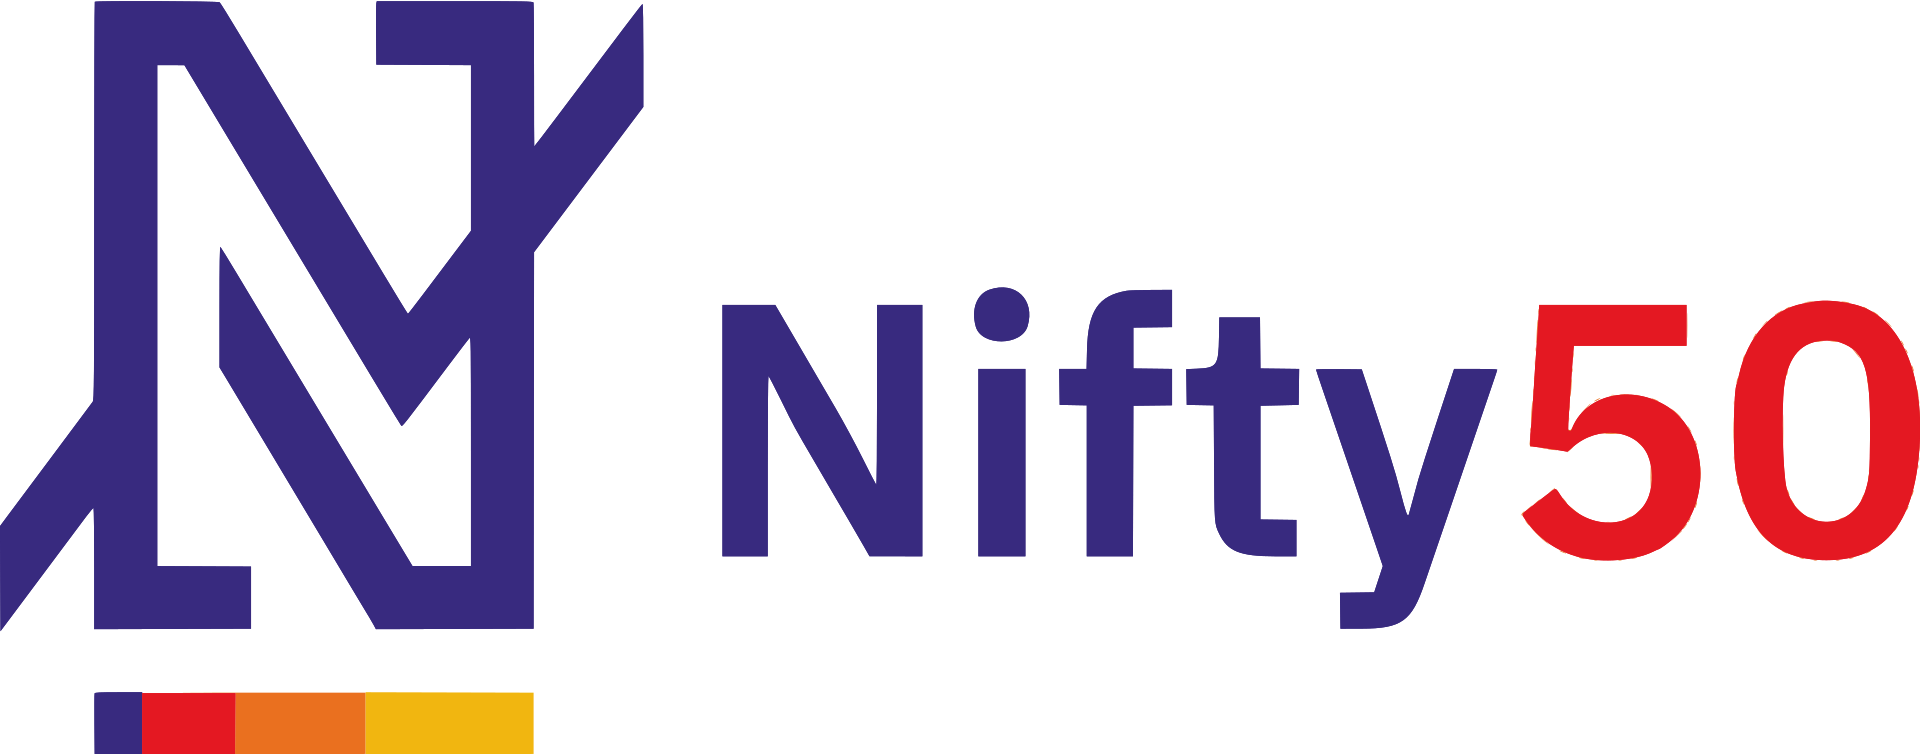

>[LIBRARIES](#scrollTo=7sJpWPrp_NIn)

>[EDA (EXPLORATORY DATA ANALYSIS)](#scrollTo=fmeo2_7S_NJJ)

>>[Distribution of NIFTY_50 prices for the year 2023](#scrollTo=cxKrUGMUkpkA)

>>[Average pricing of stocks](#scrollTo=tLo5bGq1UHUH)

>>[How was the distribution of data for all the elements of nifty_50 ?](#scrollTo=D3u4UWOrUMBB)

>>[Distribution specifically for the elements related for NIFTY_50 ?](#scrollTo=HjwyUXPzUv6x)

>>[How Volume and Close price Varied for the NIFTY_50 ?](#scrollTo=L9gfD6OkUwG0)

>>[Yearly Return](#scrollTo=dV-4Q_h483mm)

>>[Gauage Indicator](#scrollTo=FLXwgEkqUuZJ)

>>[Candlestick Analysis](#scrollTo=SijUKrrrVpgR)

>>[OHLC Chart](#scrollTo=rAzQzLqxWlvX)

>>[How the volume of tradings varied this year?](#scrollTo=sHiZTeppukEJ)

>>[Relationship between the closing prices of top 50 companies](#scrollTo=iCXt6SA6sami)

>>[Relationship of Volumes of Top 50 stocks](#scrollTo=QmqNl43jt40h)

>>[Relationship of Close Price and Trading Volume of a stock](#scrollTo=48MKTIW4rI4i)

>>[Performance of stocks](#scrollTo=5b3TFYU1_NJL)

>>[Volatility](#scrollTo=28S-SIq6_NJM)

>>[Trading by Volume](#scrollTo=rT4Bb1X5_NJN)

>>[Relationships between features](#scrollTo=tIs7k3613uMK)

>[TECHNICAL ANALYSIS](#scrollTo=JEU7cPocqVVI)

>>[Relative Strength Index](#scrollTo=NlImnpJYpElX)

>>[Average Turn Ratio](#scrollTo=l-ib-B2CrkWF)

>>[Support and Resistance](#scrollTo=gCakfgo_6ZA4)

>>[Fibonacci Retracement](#scrollTo=yRK8fSXksxGI)

>>[MACD](#scrollTo=KdssZ_EeCZrW)

>>[Bollinger Band](#scrollTo=g7uHIfweEAJn)

>>[Seasonal Decompose](#scrollTo=3S4RflABVOIx)

>[Sector wise Analysis](#scrollTo=pnCtNVFNYvRB)

>>[Sector wise average stock price](#scrollTo=y3W4af1L-lTO)

>>[Sector wise Performance](#scrollTo=ZHROdRNnAUSG)

>>[Sector wise Volatility](#scrollTo=4U-kXCzEKmTO)

>>[Sector wise Volume](#scrollTo=j-8QMb6SAj8e)

>>[Sector wise Distribution of Close Price](#scrollTo=aTkqoT7MVp-C)

>>[Relationship between Sectors](#scrollTo=kfJfRO0aVwjg)



#**LIBRARIES**

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from statsmodels.tsa.seasonal import seasonal_decompose

************************************************************************************************************************************************************

This is the list of nifty 50 companies and nifty 50. We will be extracting data from a open source library called Yahoo! Finance. yfinance is a Python library that provides a simple and convenient interface for accessing financial data from Yahoo Finance. It allows users to retrieve historical market data, stock quotes, and other financial information.

**NIFTY50 + TOP 50 Companies**

In [ ]:
nifty_50_symbol = '^NSEI'
nifty_50_companies = [
    'ADANIENT.NS', 'ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS', 'AXISBANK.NS',
    'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BPCL.NS',
    'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS',
    'HCLTECH.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS',
    'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'IOC.NS', 'ITC.NS', 'JSWSTEEL.NS',
    'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS',
    'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS', 'SBIN.NS', 'SHREECEM.NS', 'SUNPHARMA.NS',
    'TATACONSUM.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS',
    'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS'
]

These are the weight assigned to each and every compaany. These data is taken from Forbes India offical website. These weight entirely depend on the individual levels. It is just measuring the impact of the movement of an individual stock over the entire nifty and based on the that th eweights are assigned to them.

In [ ]:
w = np.array([0.88, 0.75, 0.63, 1.77, 3.38, 0.78, 2.15, 1.03, 2.90, 0.47, 0.72, 0.88, 0.55, 0.80, 0.60, 0.84, 1.61, 13.26, 0.84, 0.56, 0.85, 2.58, 7.42, 1.08, 5.89, 6.38 , 4.37, 0.84, 2.93, 4.26, 1.67, 1.60, 0.98, 1.41, 0.86, 1.08, 9.11, 0.73, 2.46, 0.46, 1.50, 0.64, 1.41, 1.18, 4.05, 0.86, 1.65, 1.18, 0.33, 0.66])

**FUNCTIONS TO EXTRACT ELEMENTS**

Functions are created to extract different elements of a stok

In [ ]:
def get_stock_open(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data['Open']

def get_stock_high(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data['High']

def get_stock_low(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data['Low']

def get_stock_close(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data['Close']

def get_stock_adjclose(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data['Adj Close']

def get_stock_volume(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data['Volume']

**Date**

We will continue our study for the entire year 2023.

In [ ]:
start_date = '2022-12-31'
end_date = '2023-12-31'

**Extracting Data of NIFTY_50 + 50 companies**

Using the for loop for extracting the data for each and every company and nifty 50.

In [ ]:
open = pd.DataFrame()

open['NIFTY_50'] = get_stock_open(nifty_50_symbol, start_date, end_date)

for company_symbol in nifty_50_companies:
    open[company_symbol] = get_stock_open(company_symbol, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
high = pd.DataFrame()

high['NIFTY_50'] = get_stock_high(nifty_50_symbol, start_date, end_date)

for company_symbol in nifty_50_companies:
    high[company_symbol] = get_stock_high(company_symbol, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
low = pd.DataFrame()

low['NIFTY_50'] = get_stock_low(nifty_50_symbol, start_date, end_date)

for company_symbol in nifty_50_companies:
    low[company_symbol] = get_stock_low(company_symbol, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
close = pd.DataFrame()

close['NIFTY_50'] = get_stock_close(nifty_50_symbol, start_date, end_date)

for company_symbol in nifty_50_companies:
    close[company_symbol] = get_stock_close(company_symbol, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
adjclose = pd.DataFrame()

adjclose['NIFTY_50'] = get_stock_adjclose(nifty_50_symbol, start_date, end_date)

for company_symbol in nifty_50_companies:
    adjclose[company_symbol] = get_stock_adjclose(company_symbol, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
volume = pd.DataFrame()

volume['NIFTY_50'] = get_stock_volume(nifty_50_symbol, start_date, end_date)

for company_symbol in nifty_50_companies:
    volume[company_symbol] = get_stock_volume(company_symbol, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Sample of one of the element containing the first column as NIFTY_50 and rest as other fifty companies.

In [ ]:
close.tail()

,NIFTY_50,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BHARTIARTL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-22,21349.400391,2808.350098,1027.500000,5541.399902,3341.300049,1088.300049,6372.100098,7295.299805,1672.050049,989.549988,...,1243.650024,992.799988,724.700012,133.550003,3824.000000,1275.150024,3627.350098,9969.000000,581.650024,462.649994
2023-12-26,21441.349609,2865.449951,1028.750000,5633.149902,3383.350098,1094.250000,6464.549805,7162.299805,1645.300049,999.849976,...,1247.500000,1007.349976,719.549988,135.199997,3795.550049,1282.000000,3656.699951,10018.650391,586.099976,470.100006
2023-12-27,21654.750000,2843.350098,1024.400024,5687.450195,3404.449951,1106.349976,6709.649902,7232.799805,1669.449951,1021.200012,...,1252.449951,1026.750000,740.900024,137.199997,3811.199951,1280.150024,3689.250000,10436.099609,583.200012,470.950012
2023-12-28,21778.699219,2809.899902,1016.950012,5760.500000,3397.250000,1107.849976,6703.299805,7258.649902,1681.199951,1036.699951,...,1262.150024,1041.000000,753.900024,138.149994,3799.899902,1285.949951,3715.100098,10426.299805,589.450012,469.450012
2023-12-29,21731.400391,2848.949951,1024.349976,5704.100098,3402.399902,1102.300049,6797.250000,7327.750000,1685.800049,1032.199951,...,1259.449951,1086.800049,779.950012,139.600006,3793.399902,1272.650024,3675.449951,10503.049805,587.250000,471.299988


************************************************************************************************************************************************************

#**EDA (EXPLORATORY DATA ANALYSIS)**

##Distribution of NIFTY_50 prices for the year 2023

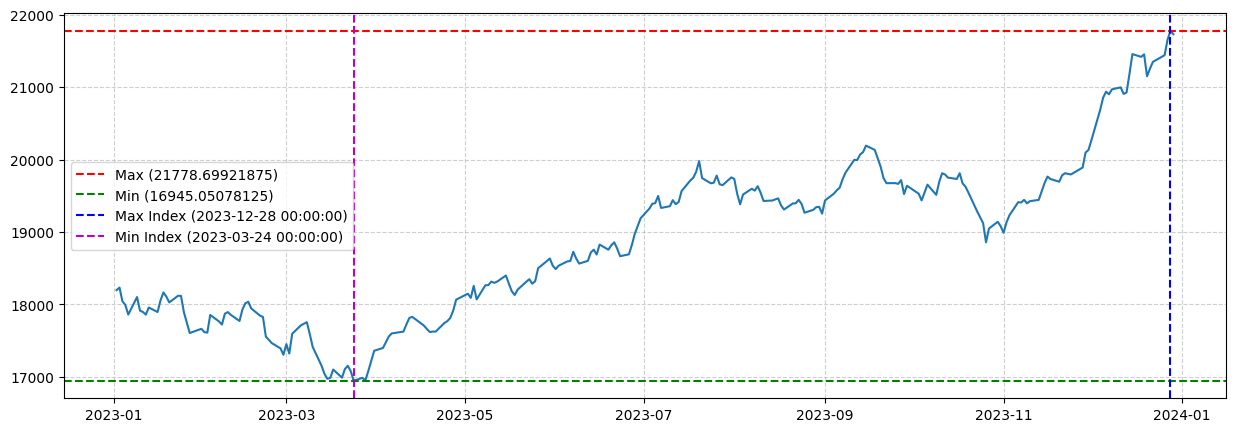

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(close['NIFTY_50'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.autoscale()

max_idx = close['NIFTY_50'].idxmax()
min_idx = close['NIFTY_50'].idxmin()

max_val = close['NIFTY_50'].loc[max_idx]
min_val = close['NIFTY_50'].loc[min_idx]

plt.axhline(y=max_val, color='r', linestyle='--', label=f'Max ({max_val})')
plt.axhline(y=min_val, color='g', linestyle='--', label=f'Min ({min_val})')

plt.axvline(x=max_idx, color='b', linestyle='--', label=f'Max Index ({max_idx})')
plt.axvline(x=min_idx, color='m', linestyle='--', label=f'Min Index ({min_idx})')

plt.legend()
plt.show()

As shown in the figure it can be inferred that the nifty 50 was at its all time high on 28th December with a values of Rs. 21778.69921875 and it was on its all time low on 24th March with a value of Rs. 16945.05078125. There can be different understandings for why the market was all time low at the end the financial year. One of the main reasons can be the portfolio adjustments of these comapnies, adoption of new tax planning and release of corporate performance report for the comapnies.

##Average pricing of stocks

In [ ]:
mean=pd.DataFrame({"Open":open.mean(),"High":high.mean(),"Low":low.mean(),"Close":close.mean(),"Adj Close":adjclose.mean(),"Volume":volume.mean()})
mean

,Open,High,Low,Close,Adj Close,Volume
NIFTY_50,18909.807350,18971.875861,18819.878516,18900.591271,18900.591271,2.634065e+05
ADANIENT.NS,2378.396731,2423.709381,2316.223885,2363.984491,2363.406769,5.602325e+06
ADANIPORTS.NS,758.553676,769.744491,745.303060,756.608980,753.963270,8.981921e+06
APOLLOHOSP.NS,4836.856132,4887.587574,4784.091817,4836.848158,4830.534560,4.483290e+05
ASIANPAINT.NS,3097.178363,3119.587134,3068.712250,3095.013065,3082.101506,9.255226e+05
AXISBANK.NS,952.648162,960.871226,943.218569,952.193060,951.721917,1.015858e+07
BAJAJ-AUTO.NS,4681.657966,4728.711833,4644.319786,4687.440619,4565.903512,4.068712e+05
BAJFINANCE.NS,6891.308564,6951.123477,6815.352226,6882.133273,6855.549312,1.033566e+06
BAJAJFINSV.NS,1490.627552,1504.055914,1473.687760,1488.265104,1487.547383,1.641722e+06
BHARTIARTL.NS,856.252654,863.280613,848.743673,856.400410,854.127534,5.079481e+06


In [ ]:
mean.idxmax()

Open          SHREECEM.NS
High          SHREECEM.NS
Low           SHREECEM.NS
Close         SHREECEM.NS
Adj Close     SHREECEM.NS
Volume       TATASTEEL.NS
dtype: object

According to this the stock which has the maximum price and is in Nifty 50 is of Shree Cement and the highest traded stock in terms of volume is Tata Steel.

In [ ]:
mean.idxmin()

Open              IOC.NS
High              IOC.NS
Low               IOC.NS
Close             IOC.NS
Adj Close         IOC.NS
Volume       SHREECEM.NS
dtype: object

The stock of Indian Oil Corporation has the lowest value amongst the Nifty 50 and the lowest traded stock in terms of volume is Shree Cement.

##How was the distribution of data for all the elements of nifty_50 ?

In [ ]:
skewness=pd.DataFrame({"Open":open.skew(),"High":high.skew(),"Low":low.skew(),"Close":close.skew(),"Adj Close":adjclose.skew(),"Volume":volume.skew()})
skewness

,Open,High,Low,Close,Adj Close,Volume
NIFTY_50,0.305769,0.328693,0.271251,0.309693,0.309693,1.562343
ADANIENT.NS,0.759472,0.817854,0.624378,0.782237,0.778748,2.704128
ADANIPORTS.NS,0.596774,0.778190,0.301019,0.579383,0.581011,4.471615
APOLLOHOSP.NS,0.120778,0.139533,0.112319,0.138080,0.136491,3.301162
ASIANPAINT.NS,-0.175770,-0.155504,-0.193799,-0.164460,-0.175318,1.956669
AXISBANK.NS,0.423698,0.422179,0.356950,0.385965,0.383572,1.837632
BAJAJ-AUTO.NS,0.564092,0.579071,0.554592,0.597146,0.507780,4.242074
BAJFINANCE.NS,-0.307888,-0.302780,-0.338588,-0.334247,-0.317590,2.908005
BAJAJFINSV.NS,-0.074890,-0.046227,-0.084819,-0.076937,-0.075978,2.412124
BHARTIARTL.NS,0.412902,0.409340,0.387693,0.389917,0.394940,6.158510


In [ ]:
skewness.idxmax()

Open              BPCL.NS
High              BPCL.NS
Low               BPCL.NS
Close             BPCL.NS
Adj Close         BPCL.NS
Volume       KOTAKBANK.NS
dtype: object

In [ ]:
skewness.idxmin()

Open               ITC.NS
High               ITC.NS
Low                ITC.NS
Close              ITC.NS
Adj Close          ITC.NS
Volume       ICICIBANK.NS
dtype: object

##Distribution specifically for the elements related for NIFTY_50 ?

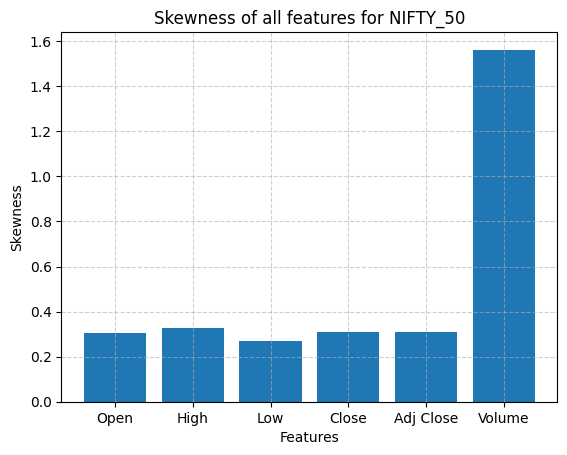

In [ ]:
plt.bar(skewness.columns,skewness.loc['NIFTY_50'])
plt.grid(True,linestyle='--',alpha=0.6)
plt.xlabel("Features")
plt.ylabel("Skewness")
plt.title("Skewness of all features for NIFTY_50")
plt.show()

##How Volume and Close price Varied for the NIFTY_50 ?

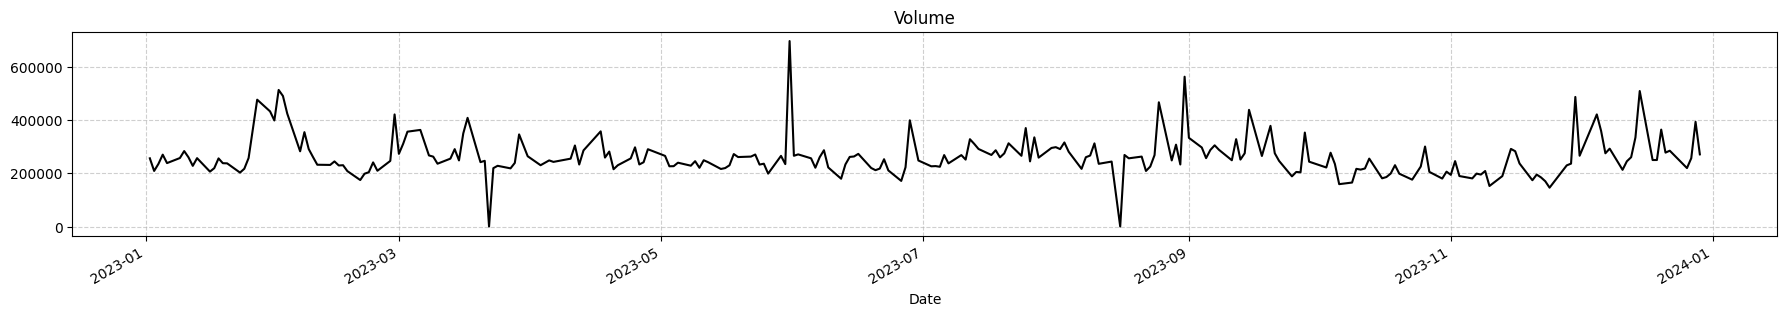

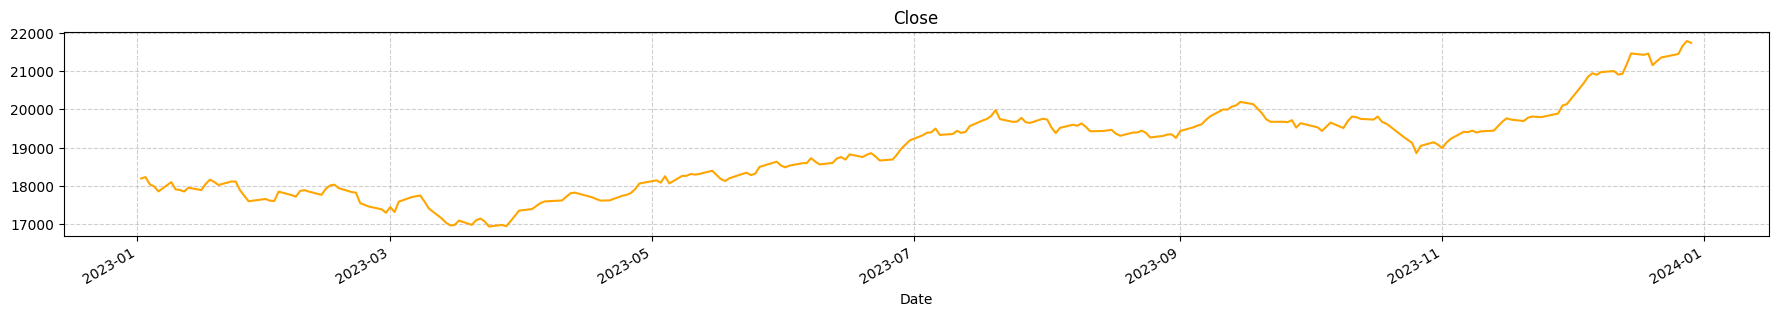

In [ ]:
plt.figure(figsize=(22,3))
volume['NIFTY_50'].plot(color='black')
plt.title('Volume')
plt.grid(True,alpha=0.6,linestyle="--")
plt.show()
plt.figure(figsize=(22,3))
close['NIFTY_50'].plot(color='orange')
plt.title('Close')
plt.grid(True,alpha=0.6,linestyle="--")
plt.show()

Hmmm!! The volume traded doesn't have a significant change while the close price have shown an upward trend. It implies that there is buying interest, and investors/traders are willing to pay higher prices for the asset. In this case, since the volume hasn't changed significantly, it might suggest that the upward price trend is not supported by a surge in trading activity.

##Yearly Return

In [ ]:
pie_pie=pd.DataFrame()
pie_pie=(close.iloc[-1]-close.iloc[0])*100/close.iloc[0]
PIE_PIE=pie_pie.drop('NIFTY_50').sort_values(ascending=True).tail(10).apply(lambda x: f'{x:.2f}%')

In [ ]:
PIE_PIE

TITAN.NS         43.25%
POWERGRID.NS     47.07%
ULTRACEMCO.NS    49.66%
HEROMOTOCO.NS    52.42%
IOC.NS           66.47%
COALINDIA.NS     67.30%
LT.NS            68.75%
NTPC.NS          85.21%
BAJAJ-AUTO.NS    90.19%
TATAMOTORS.NS    97.56%
dtype: object

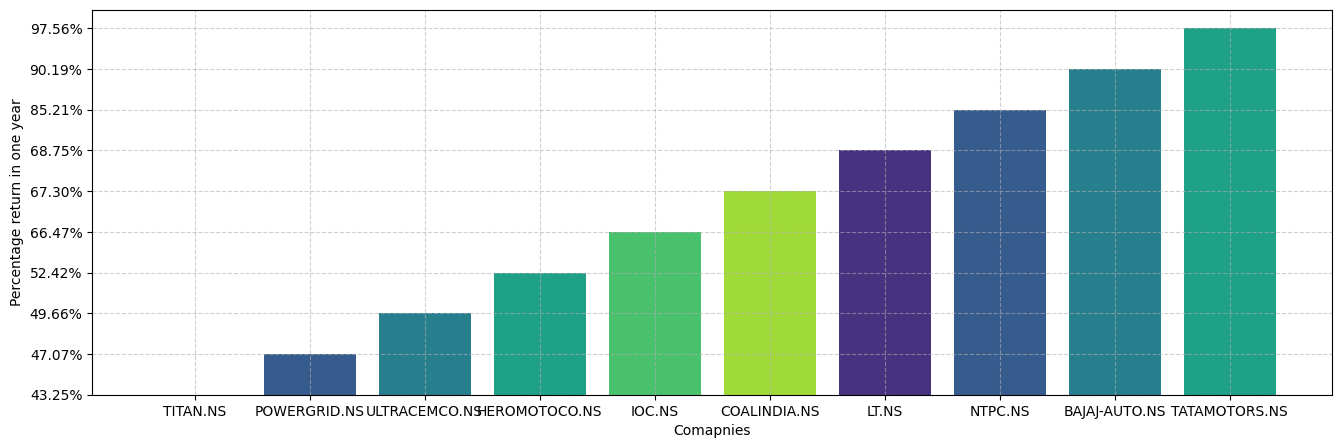

In [ ]:
plt.figure(figsize=(16,5))
plt.bar(PIE_PIE.index,PIE_PIE.values,color=sns.color_palette('viridis'))
plt.grid(True,linestyle='--',alpha=0.6)
plt.xlabel('Comapnies')
plt.ylabel('Percentage return in one year')
plt.show()

You want to invest ?????? Here are the top 10 companies that gave the highest returns in the year 2023 on the stocks.

**NIFTY50 trends from last year**

##Gauage Indicator

It creates a simple dashboard with two visual elements (indicators) showing the most recent closing value of the NIFTY 50 index. One of them includes a gauge, and the other includes a delta value compared to the mean (average) closing value of the NIFTY 50 index. This can provide a quick visual representation of how the current closing value compares to the historical average.

In [ ]:
closing_value = close['NIFTY_50'].iloc[-1]

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=closing_value,
    delta={'reference': close['NIFTY_50'].mean()},
    gauge={'axis': {'visible': False}},
    domain={'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    mode="number+delta",
    value=closing_value,
    delta={'reference': close['NIFTY_50'].mean()},
    domain={'row': 0, 'column': 1}))

fig.update_layout(
    grid={'rows': 1, 'columns': 2, 'pattern': "independent"},
    template={'data': {'indicator': [{
        'title': {'text': "NIFTY 50 Closing Value"},
        'mode': "number+delta+gauge",
        'delta': {'reference': close['NIFTY_50'].mean()}}]
    }})

fig.show()

Right now the nifty 50 price is even more than its historical average.

**INDEED A GOOD YEAR FOR THE ECONOMY**

##Candlestick Analysis

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=close.index,open=open['NIFTY_50'],high=high['NIFTY_50'],low=low['NIFTY_50'],close=close['NIFTY_50'])])
fig.update_layout(title='Candlestick Analysis',xaxis_title='Date',yaxis_title='NIFTY_50',template='plotly_dark')
fig.show()

Candlestick charts visually represent price movement in financial markets. Each candle has a body reflecting the opening and closing prices and wicks showing the high and low. A bullish candle is typically green, indicating a price increase, while a bearish one is red, signaling a decrease. Long bodies suggest significant movement, while short ones indicate less change. Doji candles reveal market indecision, and hammers show potential reversals. Engulfing patterns, where one candle covers the range of the previous one, may indicate trend changes. Traders use these patterns alongside other analyses for informed decision-making.

##OHLC Chart

In [ ]:
fig = go.Figure(data=[go.Ohlc(x=close.index, open=open['NIFTY_50'], high=high['NIFTY_50'], low=low['NIFTY_50'], close=close['NIFTY_50'])])
fig.update_layout(title='OHLC Analysis', xaxis_title='Date', yaxis_title='NIFTY_50', template='plotly_dark')
fig.show()

OHLC (Open, High, Low, Close) charts are financial charts displaying the opening, high, low, and closing prices of an asset for a given time period. Each bar represents a single period, with a vertical line extending from the lowest to the highest price, and horizontal lines indicating the opening (left) and closing (right) prices. A rising bar suggests a price increase (bullish), while a falling bar signals a decrease (bearish). Patterns and trends in OHLC charts offer insights into market sentiment, allowing traders to make informed decisions. Combining OHLC charts with technical analysis tools enhances their utility in financial analysis.

In [ ]:
closing_prices = close.iloc[:, 1:]
volumes = volume.iloc[:, 1:]

correlation_close = closing_prices.corr()
correlation_volume = volumes.corr()

corr_vol_close = closing_prices.corrwith(volumes.squeeze())


##**Relationship between the closing prices of top 50 companies**

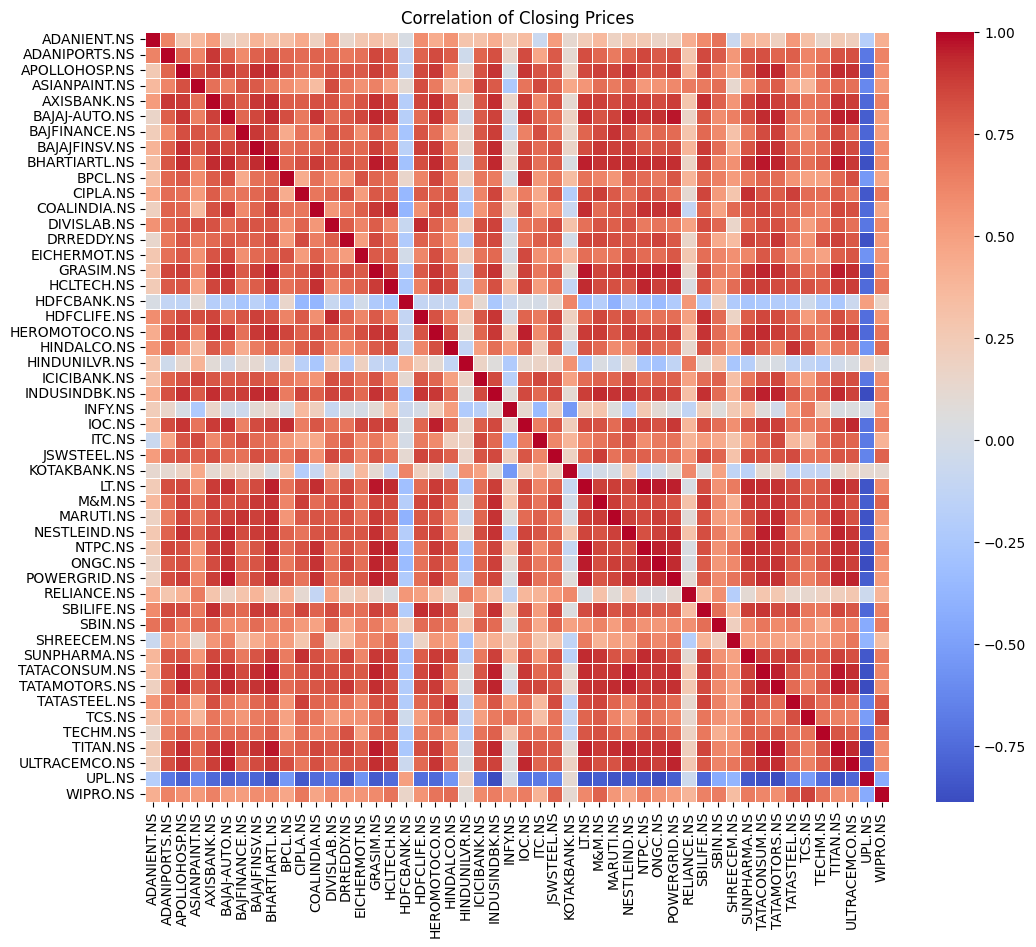

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_close, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation of Closing Prices")
plt.show()

##**Relationship of Volumes of Top 50 stocks**

Text(0.5, 1.0, 'Correlation of Volume')

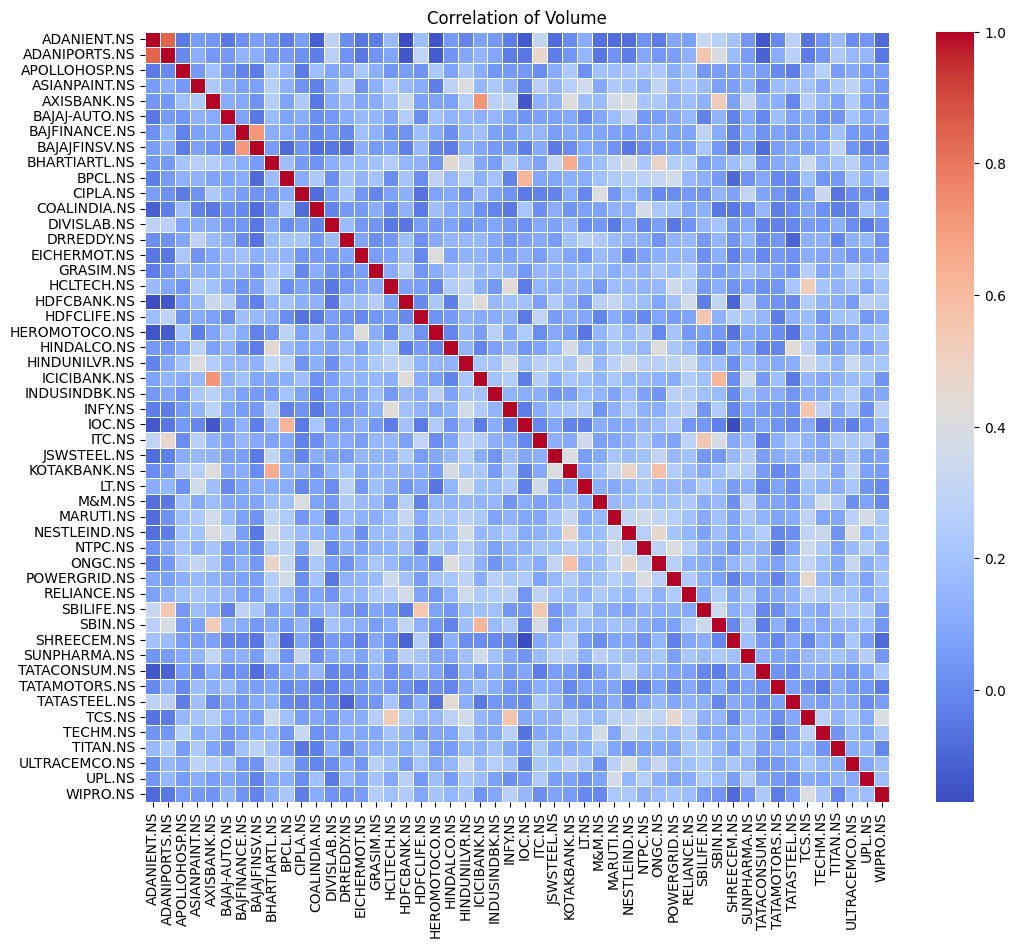

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_volume, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation of Volume")

##**Relationship of Close Price and Trading Volume of a stock**

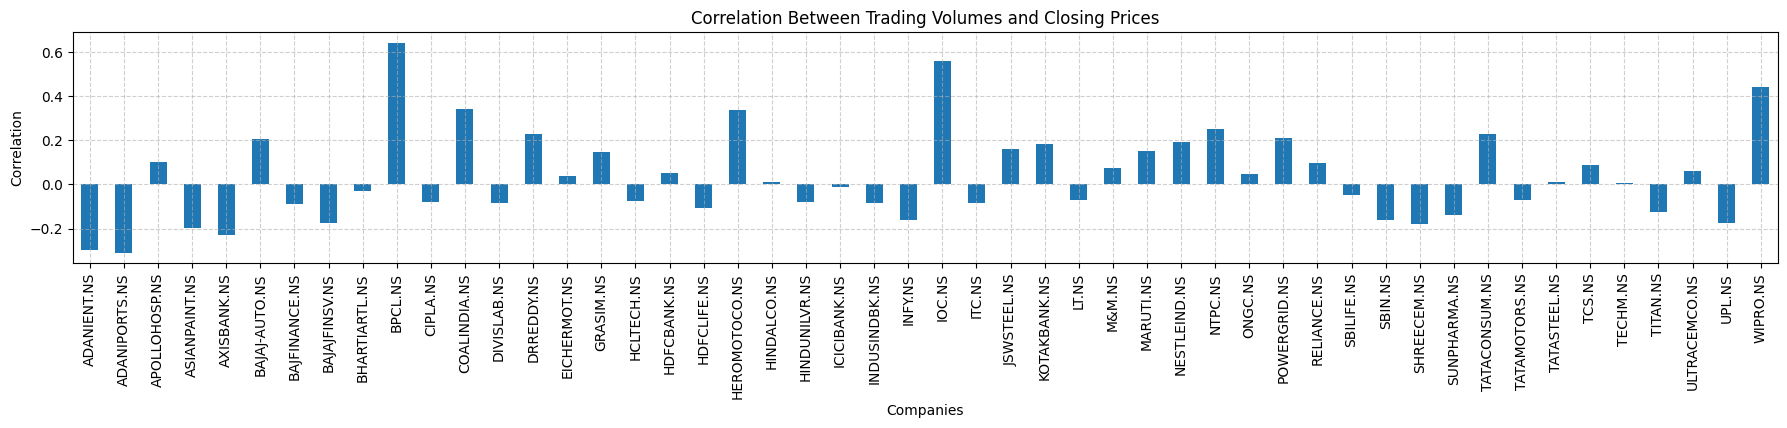

In [ ]:
plt.figure(figsize=(22, 3))
corr_vol_close.plot(kind='bar')
plt.title("Correlation Between Trading Volumes and Closing Prices")
plt.xlabel("Companies")
plt.ylabel("Correlation")
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

In [ ]:
percentage_change_close = close.pct_change().dropna()*100

##**Performance of stocks**

In [ ]:
average_percentage_change = percentage_change_close.mean()
high_performance_stock = average_percentage_change.idxmax()
low_performance_stock = average_percentage_change.idxmin()
print(f"High-Performance Stock: {high_performance_stock}")
print(f"Low-Performance Stock: {low_performance_stock}")

High-Performance Stock: TATAMOTORS.NS
Low-Performance Stock: UPL.NS


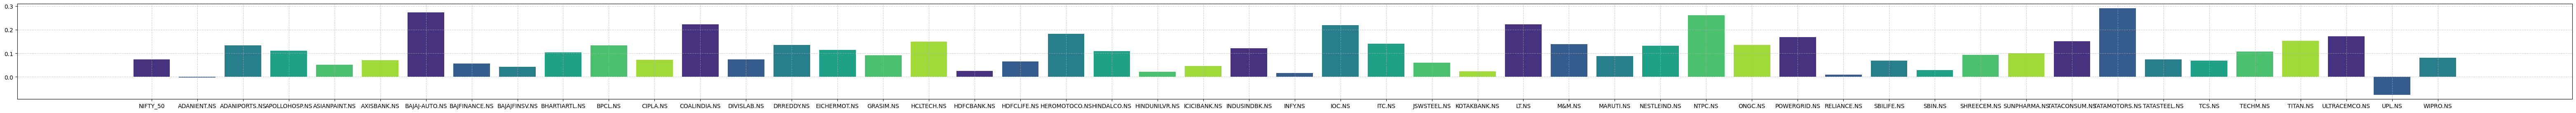

In [ ]:
plt.figure(figsize=(80,3))
plt.bar(average_percentage_change.index,average_percentage_change,color=sns.color_palette('viridis'))
plt.grid(True,alpha=0.6,linestyle='--')
plt.show()

##**Volatility**

In [ ]:
volatility = percentage_change_close.std()
high_volatility_stock = volatility.idxmax()
low_volatility_stock = volatility.idxmin()
print(f"Highest Volatility Stock: {high_volatility_stock}")
print(f"Lowest Volatility Stock: {low_volatility_stock}")

Highest Volatility Stock: ADANIENT.NS
Lowest Volatility Stock: NIFTY_50


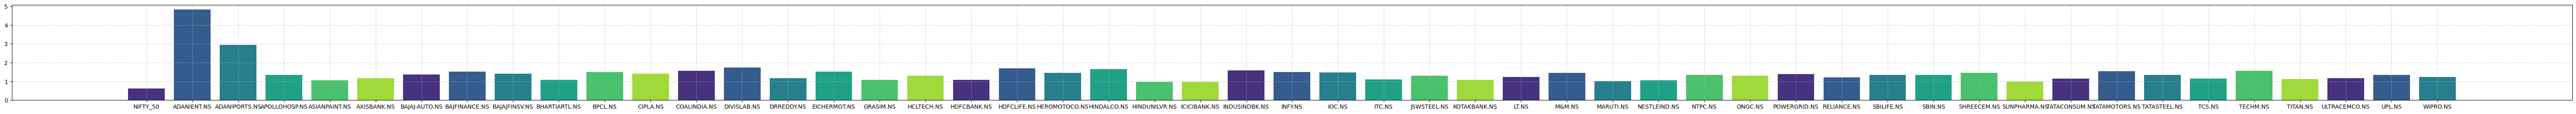

In [ ]:
plt.figure(figsize=(80,3))
plt.bar(volatility.index,volatility,color=sns.color_palette('viridis'))
plt.grid(True,alpha=0.6,linestyle='--')
plt.show()

##**Trading by Volume**

In [ ]:
average_volume = volume.mean()
high_volume_stock = average_volume.idxmax()
low_volume_stock = average_volume.idxmin()

print(f"Average Trading                               Volume = {average_volume.mean()}")
print(f"Highest Trading Volume Stock: {high_volume_stock}    Volume = {average_volume[high_volume_stock]}")
print(f"Lowest  Trading Volume Stock: {low_volume_stock}     Volume = {average_volume[low_volume_stock]}")

Average Trading                               Volume = 5415562.72317878
Highest Trading Volume Stock: TATASTEEL.NS    Volume = 37184751.946938775
Lowest  Trading Volume Stock: SHREECEM.NS     Volume = 38853.11885245902


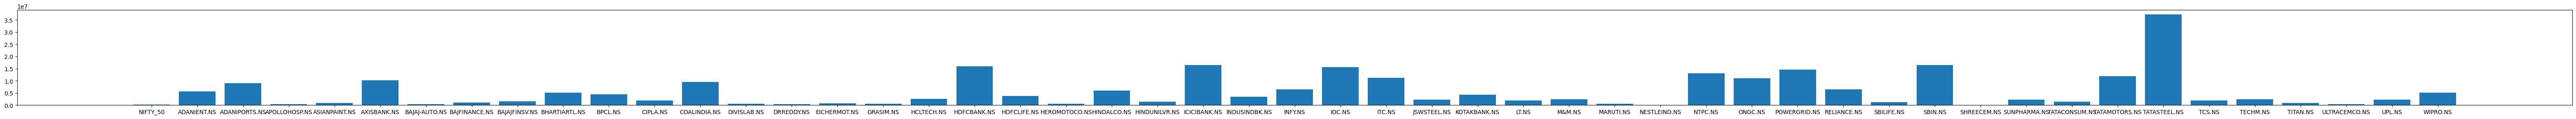

In [ ]:
plt.figure(figsize=(80,3))
plt.bar(average_volume.index,average_volume)
plt.show()

##Relationships between features

<Axes: >

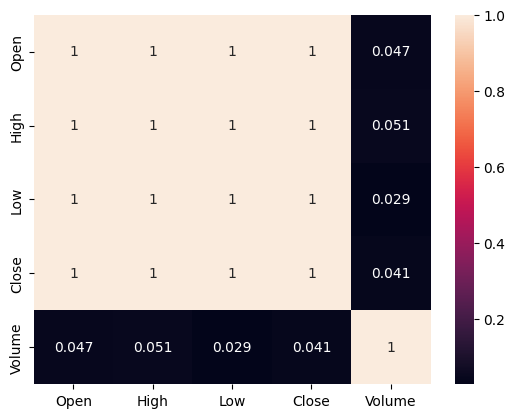

In [ ]:
data_nifty50=pd.DataFrame({'Open':open['NIFTY_50'],'High':high['NIFTY_50'],'Low':low['NIFTY_50'],'Close':close['NIFTY_50'],'Volume':volume['NIFTY_50']})
sns.heatmap(data_nifty50.corr(),annot=True)

OPEN, HIGH , LOW and CLOSE are directly related to each other.

#**TECHNICAL ANALYSIS**

##**Relative Strength Index**

In [ ]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


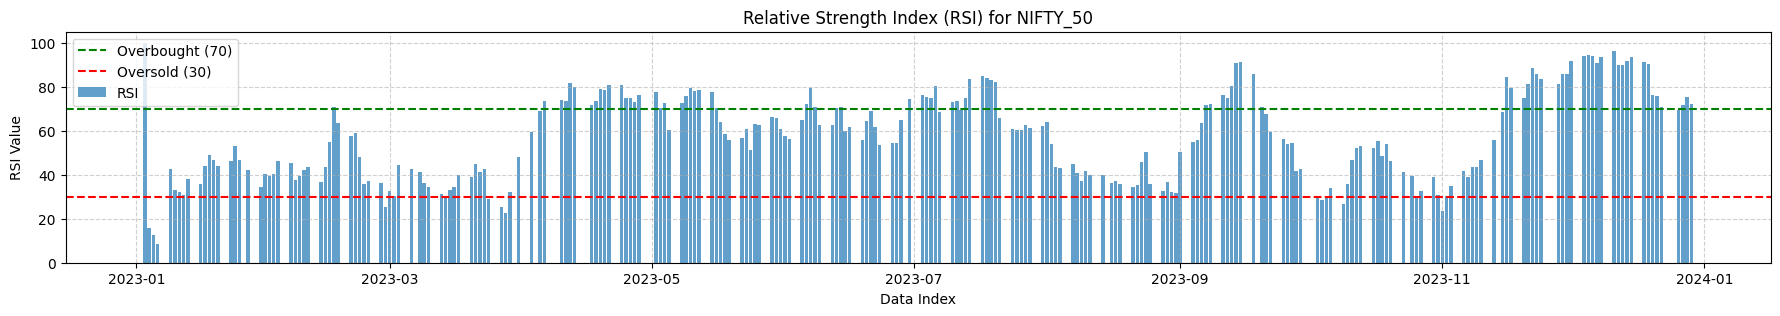

In [ ]:
rsi_values = calculate_rsi(close['NIFTY_50'])
plt.figure(figsize=(22, 3))
plt.bar(close.index, rsi_values, alpha=0.7, label='RSI')
plt.axhline(y=70, color='green', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='red', linestyle='--', label='Oversold (30)')
plt.grid(True,linestyle='--',alpha=0.6)
plt.title('Relative Strength Index (RSI) for NIFTY_50')
plt.xlabel('Data Index')
plt.ylabel('RSI Value')
plt.legend()
plt.show()

##**Average Turn Ratio**

In [ ]:
def calculate_atr(High,Low,Close, period=14):
    high = High
    low = Low
    close = Close
    tr1 = np.abs(high - low)
    tr2 = np.abs(high - close.shift())
    tr3 = np.abs(low - close.shift())
    true_range = np.maximum(tr1, np.maximum(tr2, tr3))
    atr = true_range.ewm(span=period, adjust=False).mean()
    return atr

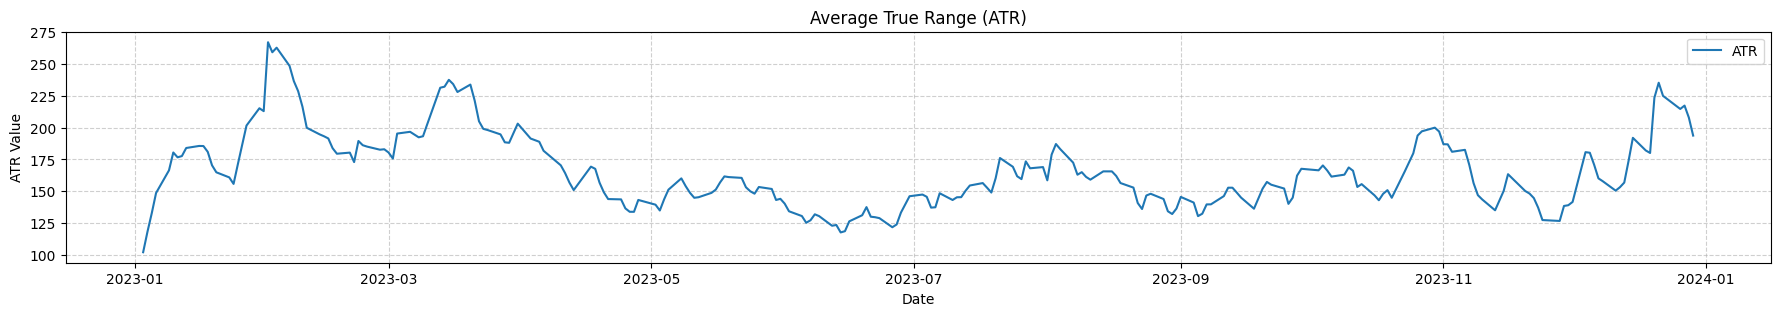

In [ ]:
atr_values = calculate_atr(high['NIFTY_50'],low['NIFTY_50'],close['NIFTY_50'])
plt.figure(figsize=(22, 3))
plt.plot(atr_values, label='ATR')
plt.grid(True,linestyle='--',alpha=0.6)
plt.title('Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('ATR Value')
plt.legend()
plt.show()

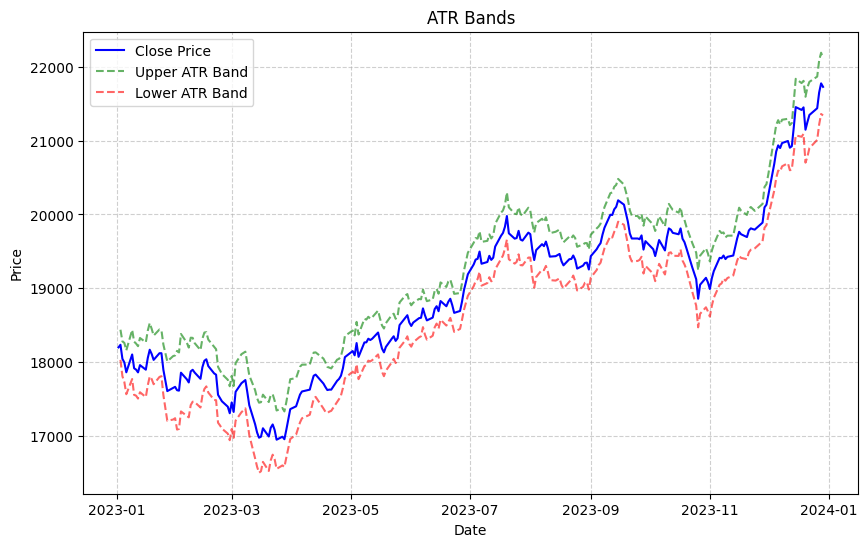

In [ ]:

atr_bands = pd.DataFrame(index=close.index)
atr_bands['ATR'] = calculate_atr(high['NIFTY_50'],low['NIFTY_50'],close['NIFTY_50'])

multiplier = 2
atr_bands['Upper_Band'] = close['NIFTY_50'] + multiplier * atr_bands['ATR']
atr_bands['Lower_Band'] = close['NIFTY_50'] - multiplier * atr_bands['ATR']

plt.figure(figsize=(10, 6))
plt.plot(close.index, close['NIFTY_50'], label='Close Price', color='blue')
plt.plot(atr_bands.index, atr_bands['Upper_Band'], label='Upper ATR Band', color='green', linestyle='--',alpha=0.6)
plt.plot(atr_bands.index, atr_bands['Lower_Band'], label='Lower ATR Band', color='red', linestyle='--',alpha=0.6)
plt.title('ATR Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

##**Support and Resistance**

In [ ]:
def identify_support(data, sensitivity=3):
    return data[data == data.rolling(window=sensitivity).min()]

def identify_resistance(data, sensitivity=3):
    return data[data == data.rolling(window=sensitivity).max()]

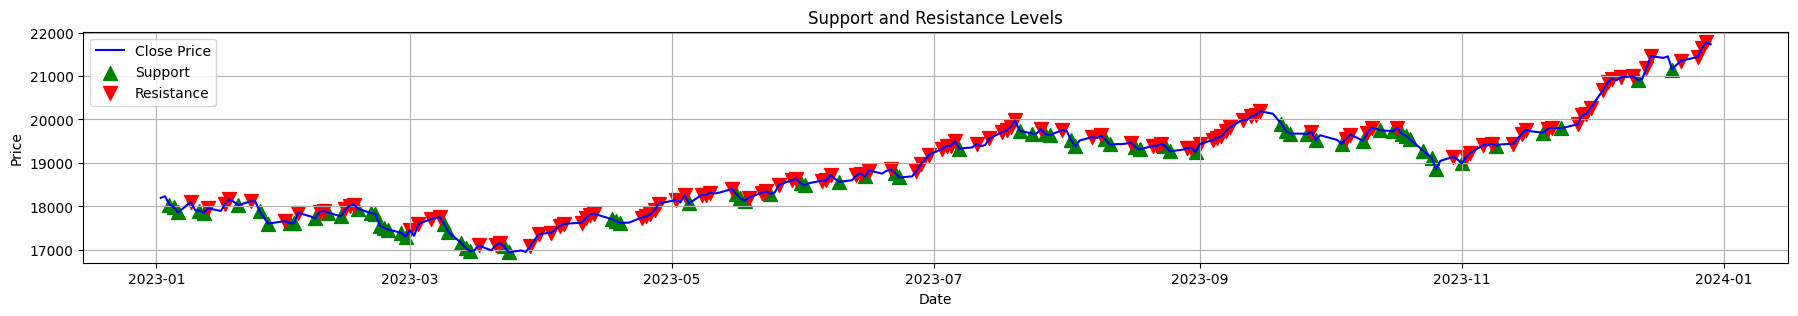

In [ ]:
x = identify_support(close['NIFTY_50'])
y = identify_resistance(close['NIFTY_50'])

plt.figure(figsize=(22, 3))
plt.plot(close.index, close['NIFTY_50'], label='Close Price', color='blue')
plt.scatter(x.index, x, label='Support', color='green', marker='^', s=100)
plt.scatter(y.index, y, label='Resistance', color='red', marker='v', s=100)
plt.title('Support and Resistance Levels')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

##**Fibonacci Retracement**

In [ ]:
max_price = close['NIFTY_50'].max()
min_price = close['NIFTY_50'].min()
fibonacci_levels = [0, 0.236, 0.382, 0.5, 0.618, 0.786, 1]
fibonacci_values = [min_price + level * (max_price - min_price) for level in fibonacci_levels]
fig = go.Figure()
fig.add_trace(go.Scatter(x=close.index, y=close['NIFTY_50'], mode='lines', name='NIFTY 50'))
for level, value in zip(fibonacci_levels, fibonacci_values):
    fig.add_shape(
        go.layout.Shape(
            type='line',
            x0=close.index.min(),
            x1=close.index.max(),
            y0=value,
            y1=value,
            line=dict(color='red', dash='dash'),
            name=f'Fibonacci {int(level * 100)}%'
        )
    )
fig.update_layout(
    title='NIFTY 50 with Fibonacci Retracement',
    xaxis_title='Date',
    yaxis_title='Price',
    showlegend=True,
    template='plotly_dark'
)
fig.show()

How to Use:

Uptrend:

During an uptrend, traders identify the swing low (lowest point) and the swing high (highest point).
Fibonacci retracement levels (38.2%, 50%, and 61.8%) are drawn from the swing low to the swing high.
These levels serve as potential support levels where traders may anticipate a bounce in the price.

Downtrend:

During a downtrend, traders identify the swing high (highest point) and the swing low (lowest point).
Fibonacci retracement levels are drawn from the swing high to the swing low.
These levels become potential resistance levels where traders may anticipate a pullback.

##**MACD**

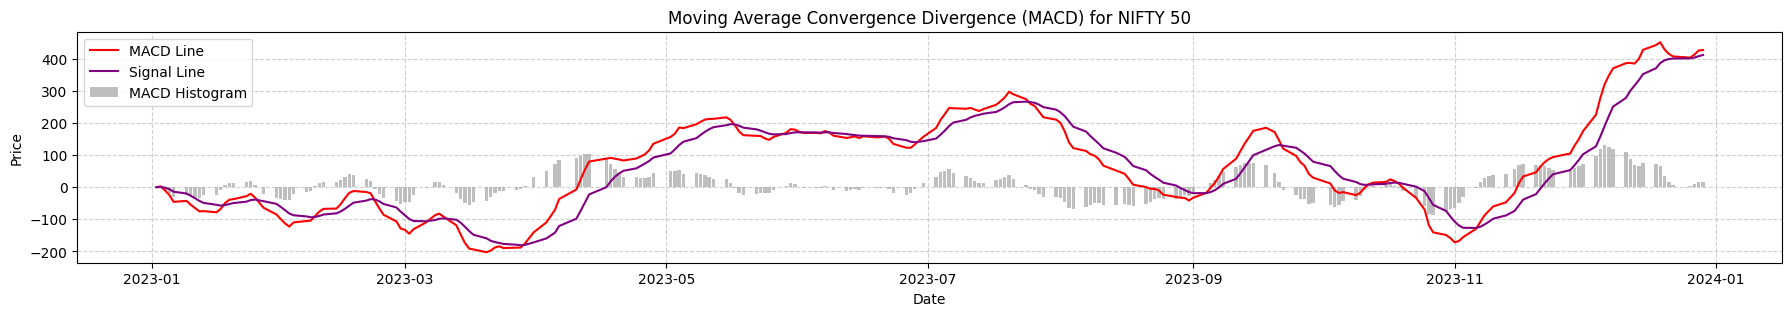

In [ ]:
macd_data = pd.DataFrame(index=close.index)

macd_data['EMA_12'] = close['NIFTY_50'].ewm(span=12, adjust=False).mean()
macd_data['EMA_26'] = close['NIFTY_50'].ewm(span=26, adjust=False).mean()
macd_data['MACD_Line'] = macd_data['EMA_12'] - macd_data['EMA_26']
macd_data['Signal_Line'] = macd_data['MACD_Line'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(22,3))
plt.bar(macd_data.index, macd_data['MACD_Line'] - macd_data['Signal_Line'], label='MACD Histogram', color='gray', alpha=0.5)
plt.plot(macd_data.index, macd_data['MACD_Line'], label='MACD Line', color='red')
plt.plot(macd_data.index, macd_data['Signal_Line'], label='Signal Line', color='purple')
plt.title('Moving Average Convergence Divergence (MACD) for NIFTY 50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

##**Bollinger Band**

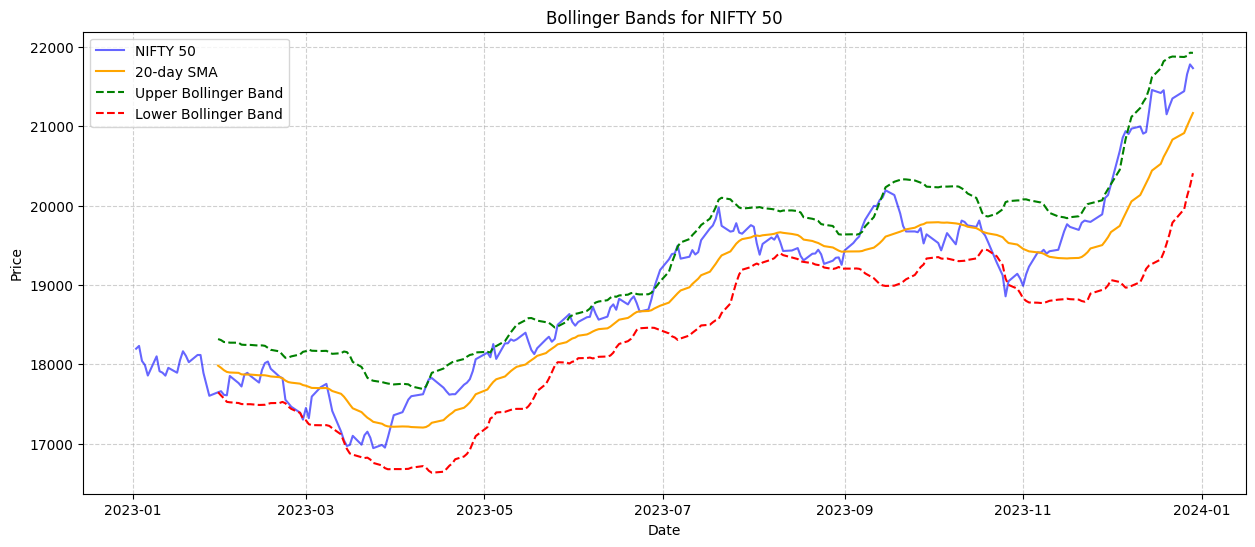

In [ ]:
bollinger_data = pd.DataFrame(index=close.index)
bollinger_data['SMA'] = close['NIFTY_50'].rolling(window=20).mean()
bollinger_data['std_dev'] = close['NIFTY_50'].rolling(window=20).std()
bollinger_data['Upper_Band'] = bollinger_data['SMA'] + 2 * bollinger_data['std_dev']
bollinger_data['Lower_Band'] = bollinger_data['SMA'] - 2 * bollinger_data['std_dev']

plt.figure(figsize=(15, 6))
plt.plot(close.index, close['NIFTY_50'], label='NIFTY 50', color='blue',alpha=0.6)
plt.plot(bollinger_data.index, bollinger_data['SMA'], label='20-day SMA', color='orange')
plt.plot(bollinger_data.index, bollinger_data['Upper_Band'], label='Upper Bollinger Band', color='green', linestyle='--')
plt.plot(bollinger_data.index, bollinger_data['Lower_Band'], label='Lower Bollinger Band', color='red', linestyle='--')

plt.title('Bollinger Bands for NIFTY 50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

##Seasonal Decompose

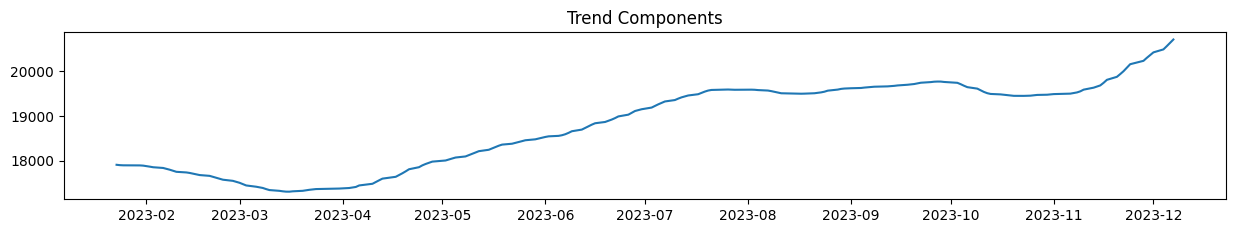

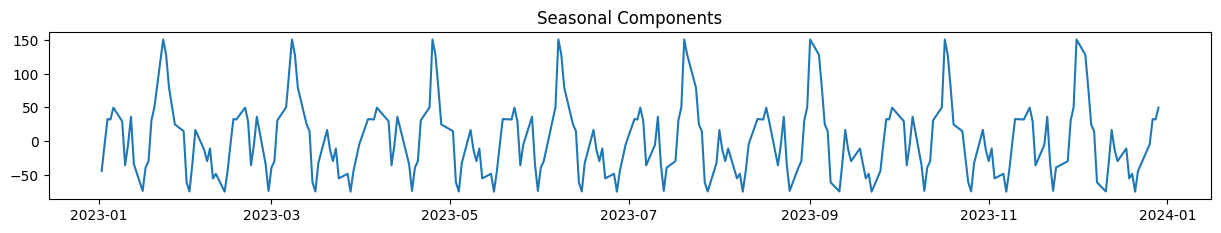

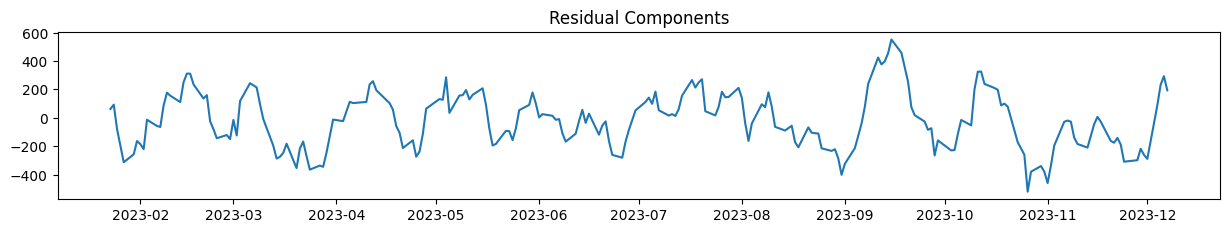

In [ ]:
results=seasonal_decompose(close['NIFTY_50'],model='additive',period=30)

plt.figure(figsize=(15,10))
plt.subplot(4,1,1)
plt.plot(results.trend,label='Trends')
plt.title('Trend Components')
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(4,1,1)
plt.plot(results.seasonal,label='Seasonal')
plt.title('Seasonal Components')
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(4,1,1)
plt.plot(results.resid,label='Residuals')
plt.title('Residual Components')
plt.show()

********************************************************************************

#**Sector wise Analysis**

In [ ]:
sectors = ['IT', 'Automobiles', 'Banks', 'Healthcare', 'Consumer Goods', 'Metals & Mining','Oil & Gas', 'Infrastructure', 'Cement', 'Financial Services', 'Conglomerates', 'Chemicals','Telcoms']

In [ ]:
wc=close.iloc[:,1:]*w

In [ ]:
wc_IT = wc[['HCLTECH.NS', 'INFY.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS']]
wc_Automobiles = wc[['M&M.NS', 'MARUTI.NS', 'TATAMOTORS.NS', 'BAJAJ-AUTO.NS', 'EICHERMOT.NS']]
wc_Banks = wc[['AXISBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'KOTAKBANK.NS', 'SBIN.NS']]
wc_Pharma_Med = wc[['SUNPHARMA.NS', 'CIPLA.NS', 'DRREDDY.NS', 'DIVISLAB.NS', 'APOLLOHOSP.NS']]
wc_Consumer_Goods = wc[['ITC.NS', 'HINDUNILVR.NS', 'NESTLEIND.NS', 'TITAN.NS', 'TATACONSUM.NS', 'ASIANPAINT.NS']]
wc_Metals_Mining = wc[['TATASTEEL.NS', 'JSWSTEEL.NS', 'HINDALCO.NS', 'COALINDIA.NS']]
wc_Oil_Gas = wc[['ONGC.NS', 'IOC.NS', 'BPCL.NS']]
wc_Infrastructure = wc[['POWERGRID.NS', 'LT.NS', 'NTPC.NS', 'ADANIPORTS.NS']]
wc_Cement = wc[['ULTRACEMCO.NS', 'SHREECEM.NS', 'GRASIM.NS']]
wc_Financial_Services = wc[['HDFCLIFE.NS', 'SBILIFE.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS']]
wc_Conglomerates = wc[['RELIANCE.NS', 'ADANIENT.NS', 'ADANIPORTS.NS']]
wc_Chemicals = wc[['UPL.NS']]
wc_Telcoms = wc[['BHARTIARTL.NS']]

In [ ]:
sd=pd.DataFrame({"IT":wc_IT.mean(),"Automobile":wc_Automobiles.mean(),"Banks":wc_Banks.mean(),"Medical":wc_Pharma_Med.mean(),"Consumer Goods":wc_Consumer_Goods.mean(),"Metal and Mining":wc_Metals_Mining.mean(),"Oil and Gas":wc_Oil_Gas.mean().mean(),"Infrastructure":wc_Infrastructure.mean(),"Cement":wc_Cement.mean(),"Financial Services":wc_Financial_Services.mean(),"Conglomerates":wc_Conglomerates.mean(),"Chemicals":wc_Chemicals.mean(),"Telcoms":wc_Telcoms.mean()})

##Sector wise average stock price

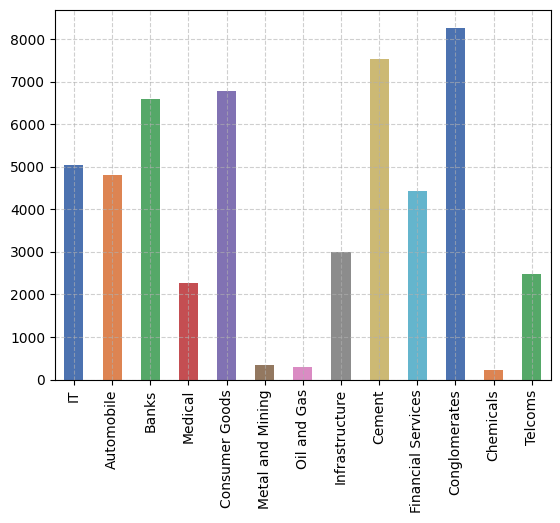

In [ ]:
sd.mean().plot(kind="bar",color=sns.color_palette('deep'))
plt.grid(True,alpha=0.6,linestyle='--')

In [ ]:
pc_IT = wc_IT.pct_change().dropna().mean().mean()*100
pc_Automobiles = wc_Automobiles.pct_change().dropna().mean().mean()*100
pc_Banks = wc_Banks.pct_change().dropna().mean().mean()*100
pc_Pharma = wc_Pharma_Med.pct_change().dropna().mean().mean()*100
pc_Consumer_Goods = wc_Consumer_Goods.pct_change().dropna().mean().mean()*100
pc_Metals_Mining = wc_Metals_Mining.pct_change().dropna().mean().mean()*100
pc_Oil_Gas = wc_Oil_Gas.pct_change().dropna().mean().mean()*100
pc_Infrastructure = wc_Infrastructure.pct_change().dropna().mean().mean()*100
pc_Cement = wc_Cement.pct_change().dropna().mean().mean()*100
pc_Financial_Services = wc_Financial_Services.pct_change().dropna().mean().mean()*100
pc_Conglomerates = wc_Conglomerates.pct_change().dropna().mean().mean()*100
pc_Chemicals = wc_Chemicals.pct_change().dropna().mean().mean()*100
pc_Telcoms = wc_Telcoms.pct_change().dropna().mean().mean()*100

##Sector wise Performance

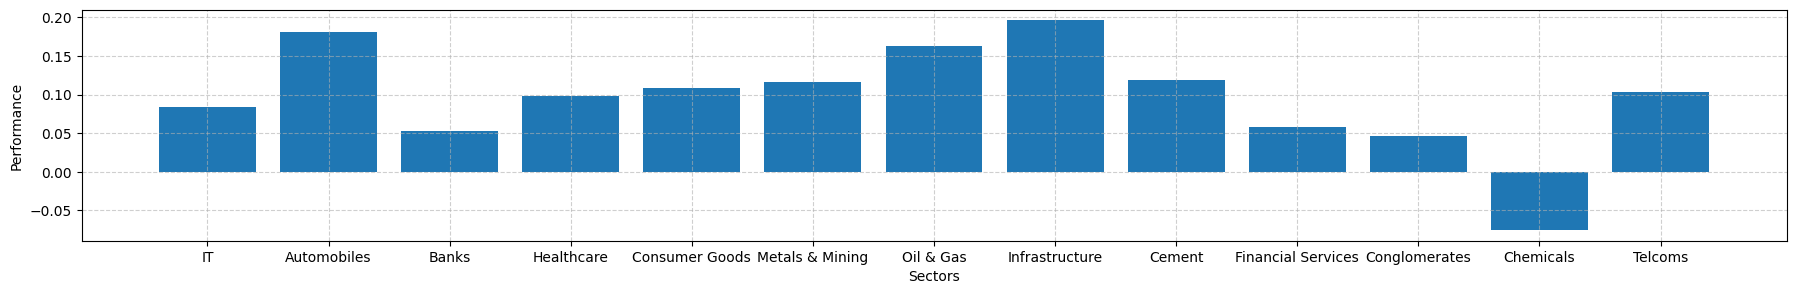

In [ ]:
percentage_changes = [pc_IT, pc_Automobiles, pc_Banks, pc_Pharma, pc_Consumer_Goods, pc_Metals_Mining,pc_Oil_Gas, pc_Infrastructure, pc_Cement, pc_Financial_Services, pc_Conglomerates, pc_Chemicals,pc_Telcoms]
plt.figure(figsize=(22, 3))
plt.bar(sectors, percentage_changes)
plt.grid(True, linestyle='--', alpha=0.6)
plt.autoscale()
plt.xlabel('Sectors')
plt.ylabel('Performance')
plt.show()

In [ ]:
sc_IT = wc_IT.pct_change().dropna().std().mean()*100
sc_Automobiles = wc_Automobiles.pct_change().dropna().std().mean()*100
sc_Banks = wc_Banks.pct_change().dropna().std().mean()*100
sc_Pharma = wc_Pharma_Med.pct_change().dropna().std().mean()*100
sc_Consumer_Goods = wc_Consumer_Goods.pct_change().dropna().std().mean()*100
sc_Metals_Mining = wc_Metals_Mining.pct_change().dropna().std().mean()*100
sc_Oil_Gas = wc_Oil_Gas.pct_change().dropna().std().mean()*100
sc_Infrastructure = wc_Infrastructure.pct_change().dropna().std().mean()*100
sc_Cement = wc_Cement.pct_change().dropna().std().mean()*100
sc_Financial_Services = wc_Financial_Services.pct_change().dropna().std().mean()*100
sc_Conglomerates = wc_Conglomerates.pct_change().dropna().std().mean()*100
sc_Chemicals = wc_Chemicals.pct_change().dropna().std().mean()*100
sc_Telcoms = wc_Telcoms.pct_change().dropna().std().mean()*100

##Sector wise Volatility

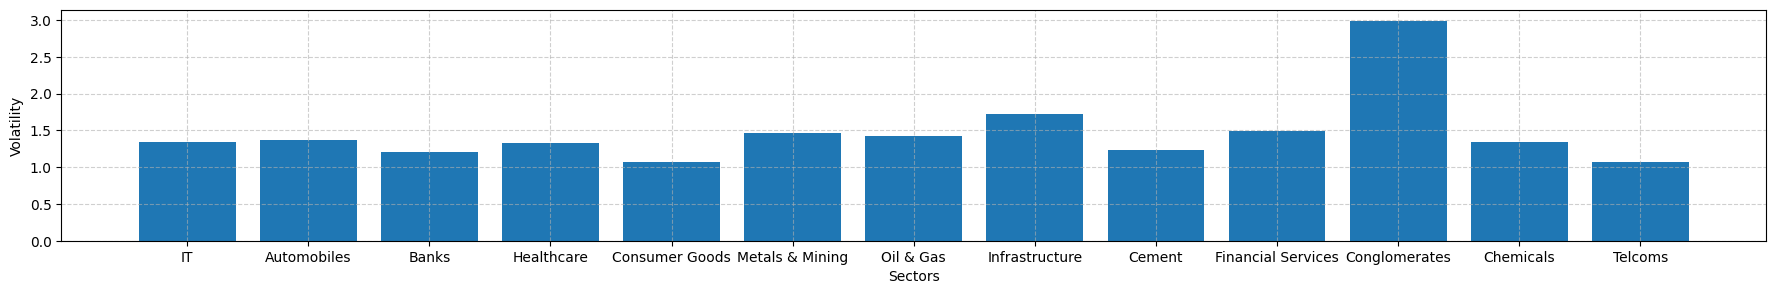

In [ ]:
std_changes = [sc_IT, sc_Automobiles, sc_Banks, sc_Pharma, sc_Consumer_Goods, sc_Metals_Mining,sc_Oil_Gas, sc_Infrastructure, sc_Cement, sc_Financial_Services, sc_Conglomerates, sc_Chemicals,sc_Telcoms]
plt.figure(figsize=(22, 3))
plt.bar(sectors, std_changes)
plt.grid(True, linestyle='--', alpha=0.6)
plt.autoscale()
plt.xlabel('Sectors')
plt.ylabel('Volatility')
plt.show()

In [ ]:
volume_IT = volume[['HCLTECH.NS', 'INFY.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS']].mean().sum()
volume_Automobiles = volume[['M&M.NS', 'MARUTI.NS', 'TATAMOTORS.NS', 'BAJAJ-AUTO.NS', 'EICHERMOT.NS']].mean().sum()
volume_Banks = volume[['AXISBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'KOTAKBANK.NS', 'SBIN.NS']].mean().sum()
volume_Pharma_Med = volume[['SUNPHARMA.NS', 'CIPLA.NS', 'DRREDDY.NS', 'DIVISLAB.NS', 'APOLLOHOSP.NS']].mean().sum()
volume_Consumer_Goods = volume[['ITC.NS', 'HINDUNILVR.NS', 'NESTLEIND.NS', 'TITAN.NS', 'TATACONSUM.NS', 'ASIANPAINT.NS']].mean().sum()
volume_Metals_Mining = volume[['TATASTEEL.NS', 'JSWSTEEL.NS', 'HINDALCO.NS', 'COALINDIA.NS']].mean().sum()
volume_Oil_Gas = volume[['ONGC.NS', 'IOC.NS', 'BPCL.NS']].mean().sum()
volume_Infrastructure = volume[['POWERGRID.NS', 'LT.NS', 'NTPC.NS', 'ADANIPORTS.NS']].mean().sum()
volume_Cement = volume[['ULTRACEMCO.NS', 'SHREECEM.NS', 'GRASIM.NS']].mean().sum()
volume_Financial_Services = volume[['HDFCLIFE.NS', 'SBILIFE.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS']].mean().sum()
volume_Conglomerates = volume[['RELIANCE.NS', 'ADANIENT.NS', 'ADANIPORTS.NS']].mean().sum()
volume_Chemicals = volume[['UPL.NS']].mean().sum()
volume_Telcoms = volume[['BHARTIARTL.NS']].mean().sum()

##Sector wise Volume

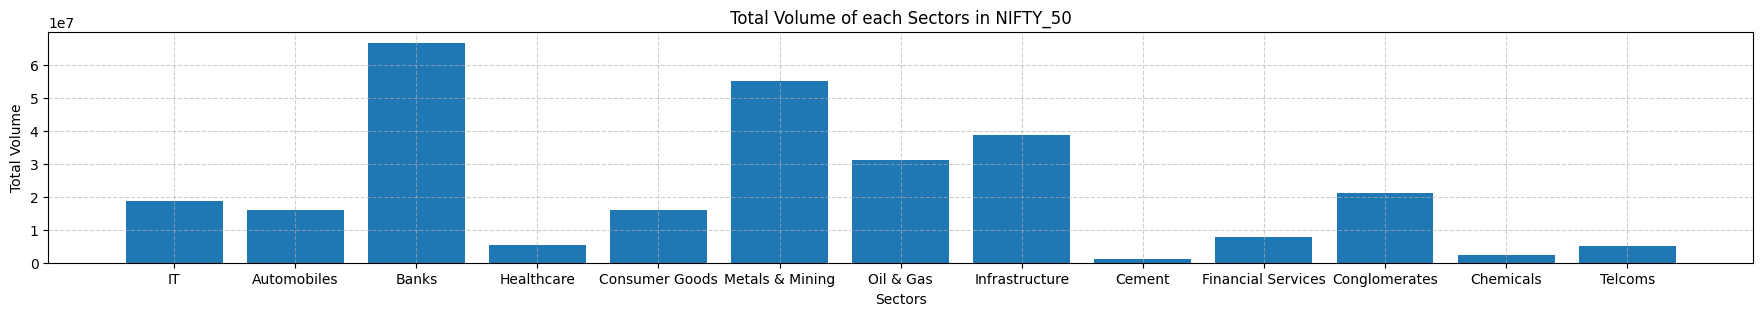

In [ ]:
vol_sector=[volume_IT,volume_Automobiles ,volume_Banks,volume_Pharma_Med ,volume_Consumer_Goods,volume_Metals_Mining,volume_Oil_Gas,volume_Infrastructure,volume_Cement,volume_Financial_Services,volume_Conglomerates,volume_Chemicals,volume_Telcoms]
plt.figure(figsize=(22,3))
plt.bar(sectors,vol_sector)
plt.grid(True,linestyle='--',alpha=0.6)
plt.xlabel('Sectors')
plt.ylabel('Total Volume')
plt.title('Total Volume of each Sectors in NIFTY_50')
plt.show()

##Sector wise Distribution of Close Price

In [ ]:
nc_IT = wc[['HCLTECH.NS', 'INFY.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS']].mean(axis=1)
nc_Automobiles = wc[['M&M.NS', 'MARUTI.NS', 'TATAMOTORS.NS', 'BAJAJ-AUTO.NS', 'EICHERMOT.NS']].mean(axis=1)
nc_Banks = wc[['AXISBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'KOTAKBANK.NS', 'SBIN.NS']].mean(axis=1)
nc_Pharma_Med = wc[['SUNPHARMA.NS', 'CIPLA.NS', 'DRREDDY.NS', 'DIVISLAB.NS', 'APOLLOHOSP.NS']].mean(axis=1)
nc_Consumer_Goods = wc[['ITC.NS', 'HINDUNILVR.NS', 'NESTLEIND.NS', 'TITAN.NS', 'TATACONSUM.NS', 'ASIANPAINT.NS']].mean(axis=1)
nc_Metals_Mining = wc[['TATASTEEL.NS', 'JSWSTEEL.NS', 'HINDALCO.NS', 'COALINDIA.NS']].mean(axis=1)
nc_Oil_Gas = wc[['ONGC.NS', 'IOC.NS', 'BPCL.NS']].mean(axis=1)
nc_Infrastructure = wc[['POWERGRID.NS', 'LT.NS', 'NTPC.NS', 'ADANIPORTS.NS']].mean(axis=1)
nc_Cement = wc[['ULTRACEMCO.NS', 'SHREECEM.NS', 'GRASIM.NS']].mean(axis=1)
nc_Financial_Services = wc[['HDFCLIFE.NS', 'SBILIFE.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS']].mean(axis=1)
nc_Conglomerates = wc[['RELIANCE.NS', 'ADANIENT.NS', 'ADANIPORTS.NS']].mean(axis=1)
nc_Chemicals = wc[['UPL.NS']].mean(axis=1)
nc_Telcoms = wc[['BHARTIARTL.NS']].mean(axis=1)

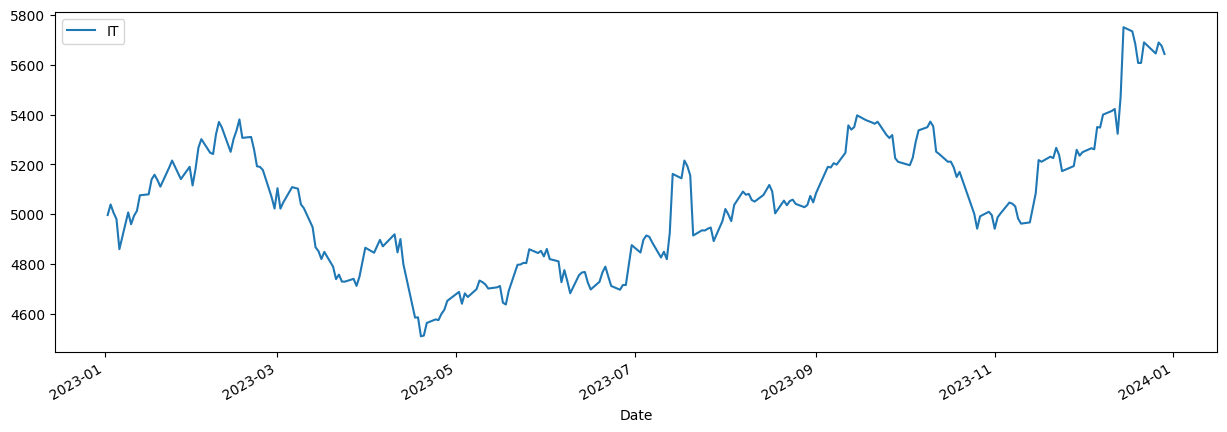

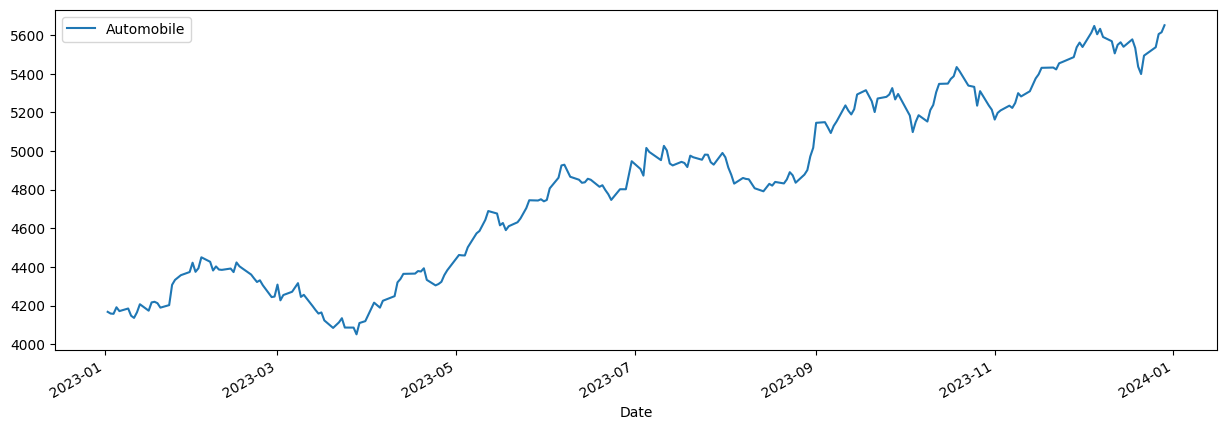

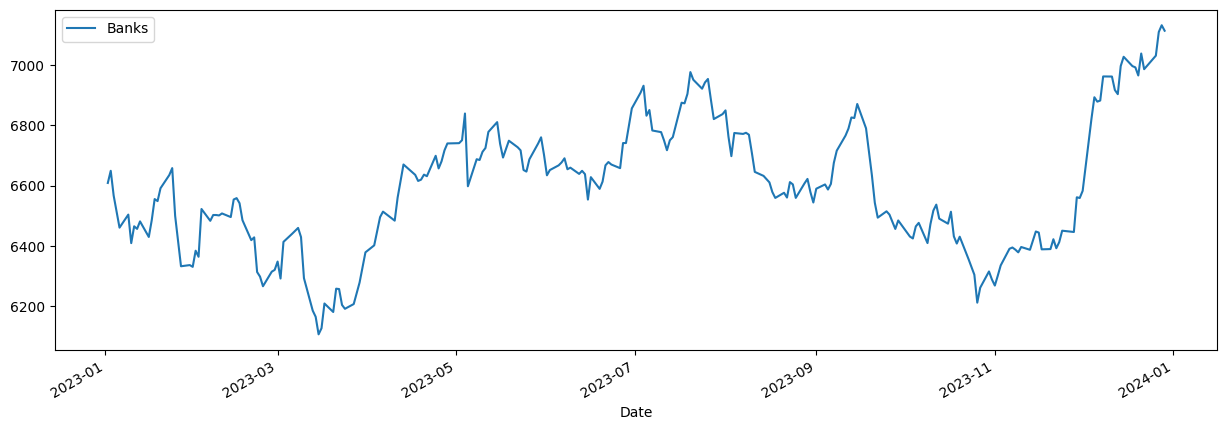

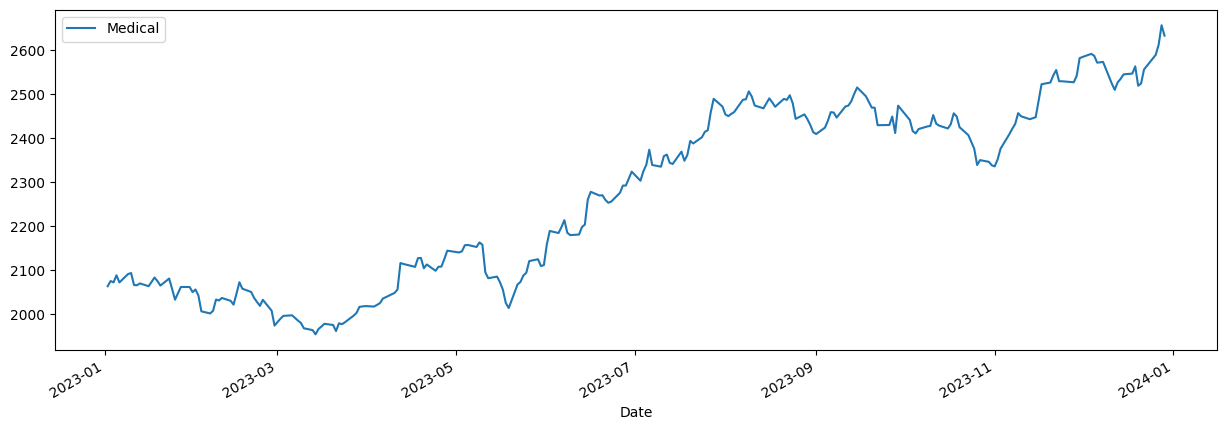

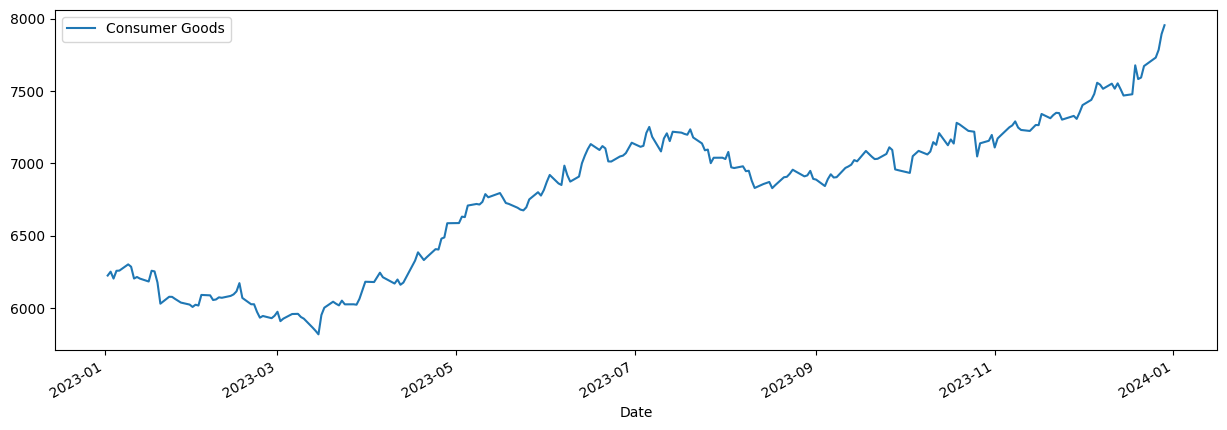

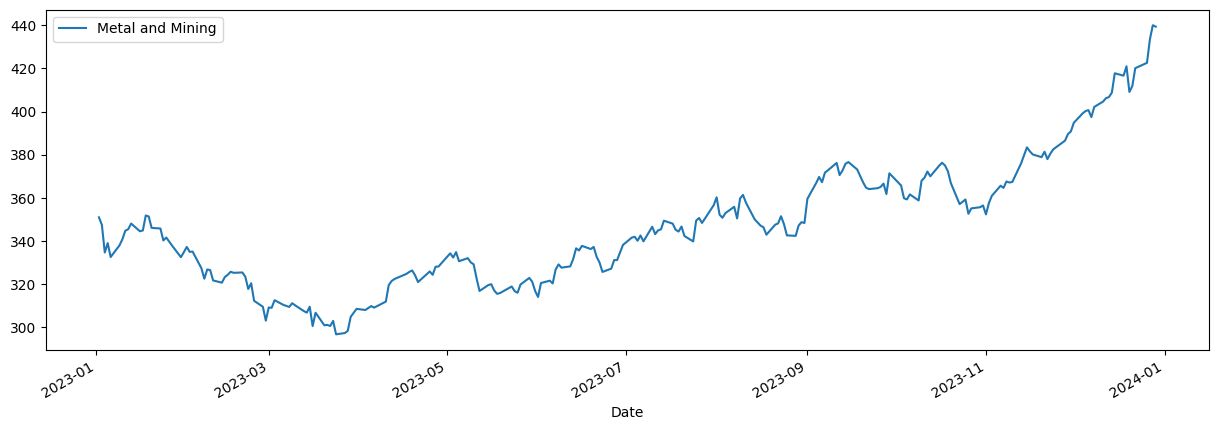

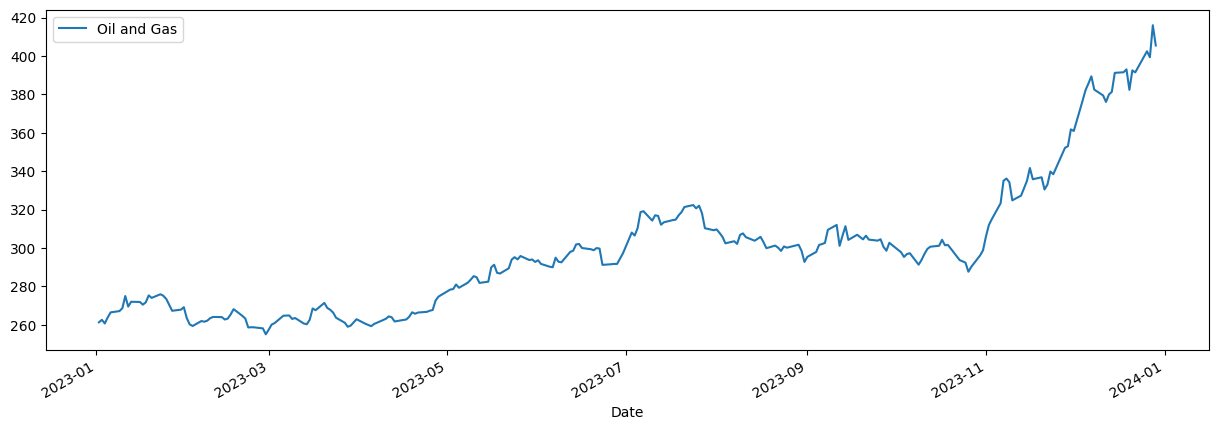

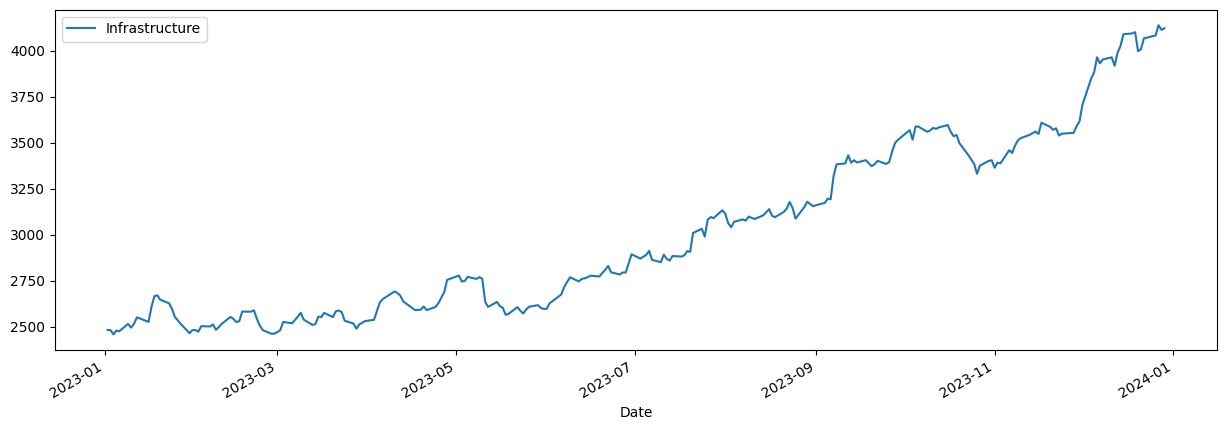

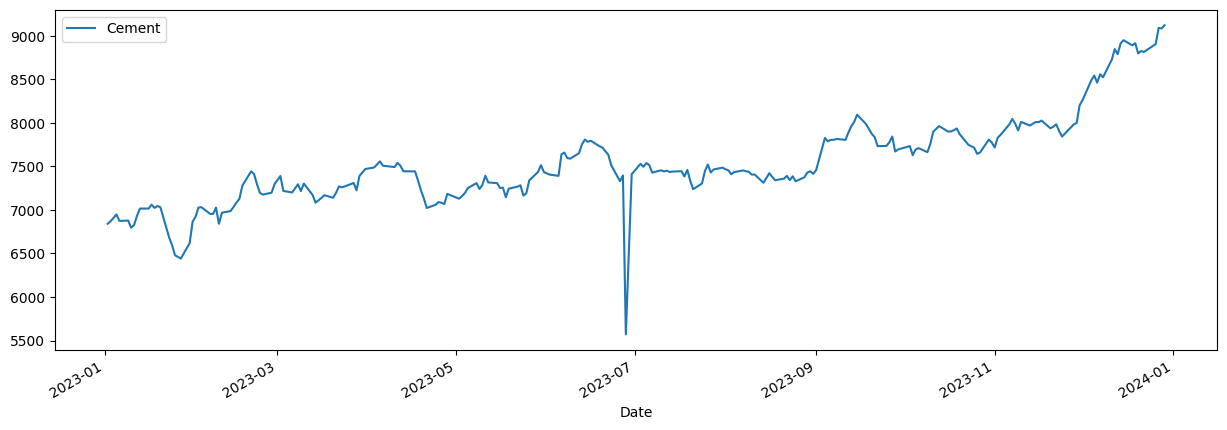

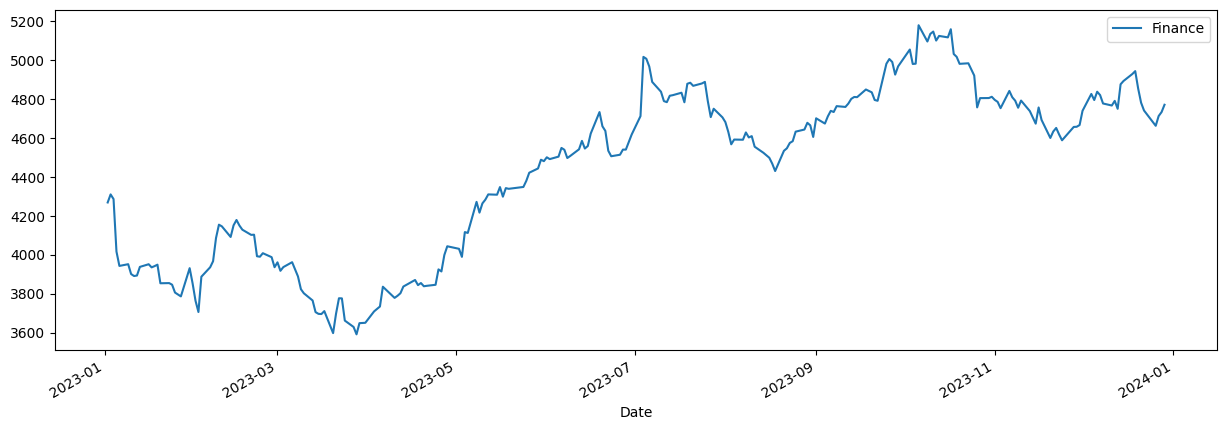

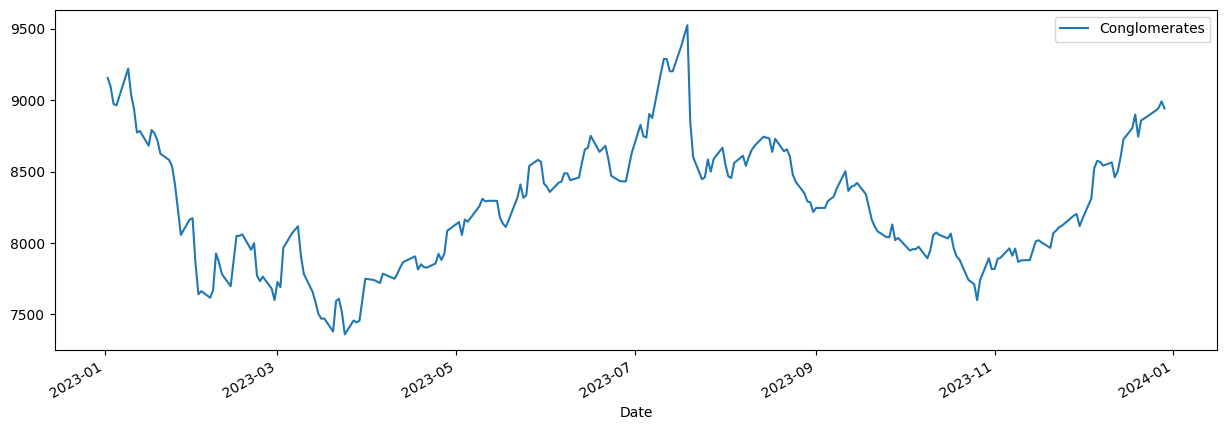

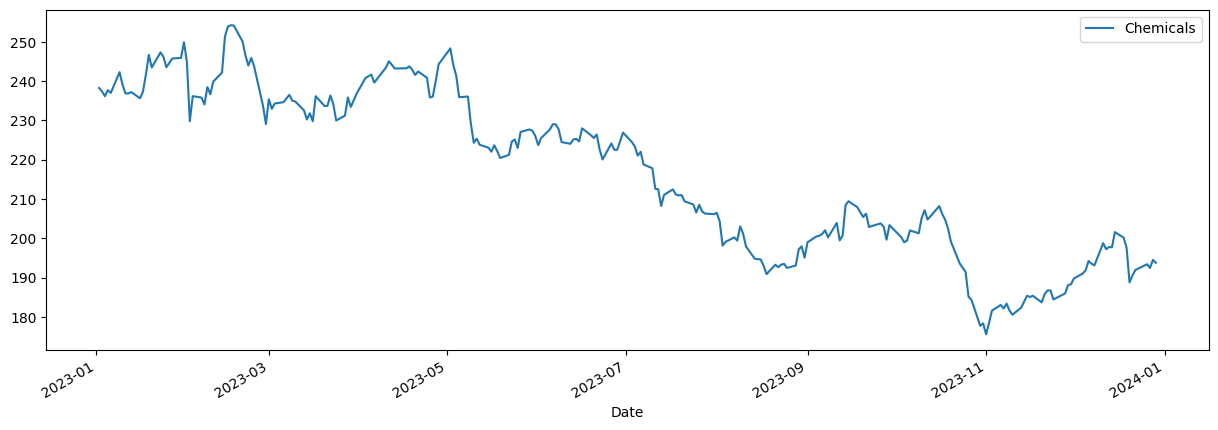

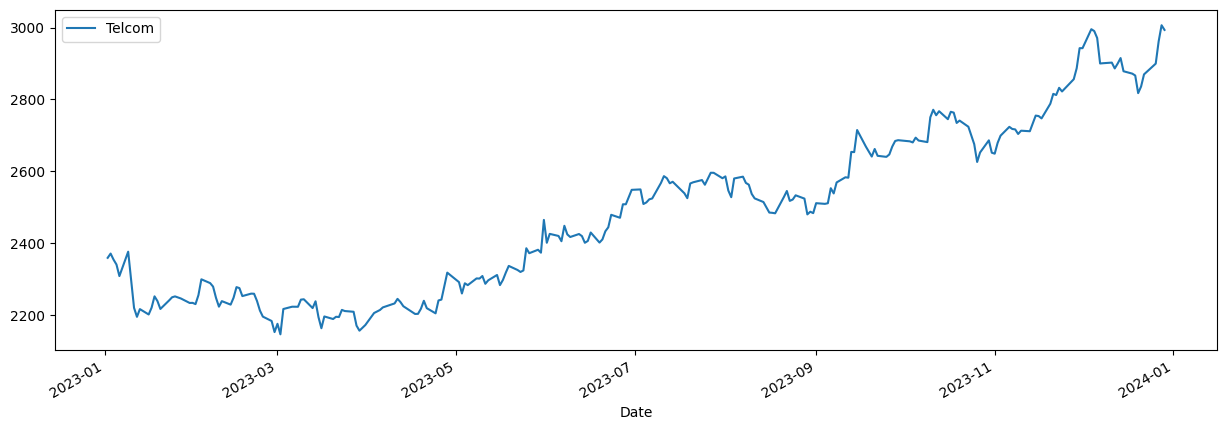

In [ ]:
plt.figure(figsize=(15,5))
nc_IT.plot(kind='line',label='IT')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))
nc_Automobiles.plot(kind='line',label='Automobile')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))
nc_Banks.plot(kind='line',label='Banks')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))
nc_Pharma_Med.plot(kind='line',label='Medical')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))
nc_Consumer_Goods.plot(kind='line',label='Consumer Goods')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))
nc_Metals_Mining.plot(kind='line',label='Metal and Mining')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))
nc_Oil_Gas.plot(kind='line',label='Oil and Gas')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))
nc_Infrastructure.plot(kind='line',label='Infrastructure')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))
nc_Cement.plot(kind='line',label='Cement')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))
nc_Financial_Services.plot(kind='line',label='Finance')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))
nc_Conglomerates.plot(kind='line',label='Conglomerates')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))
nc_Chemicals.plot(kind='line',label='Chemicals')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))
nc_Telcoms.plot(kind='line',label='Telcom')
plt.legend()
plt.show()

##Relationship between Sectors

In [ ]:
nch=pd.DataFrame({"IT":nc_IT, "Automobile":nc_Automobiles,"Banks" :nc_Banks,"Medical" :nc_Pharma_Med, "Consumer Goods":nc_Consumer_Goods, "Metals and Mining":nc_Metals_Mining,"Oil and Gas":nc_Oil_Gas,"Infrastructure" :nc_Infrastructure,"Cement" :nc_Cement,"Finance" :nc_Financial_Services, "Conglomerates":nc_Conglomerates,"Chemicals" :nc_Chemicals,"Telcoms":nc_Telcoms})

<Axes: >

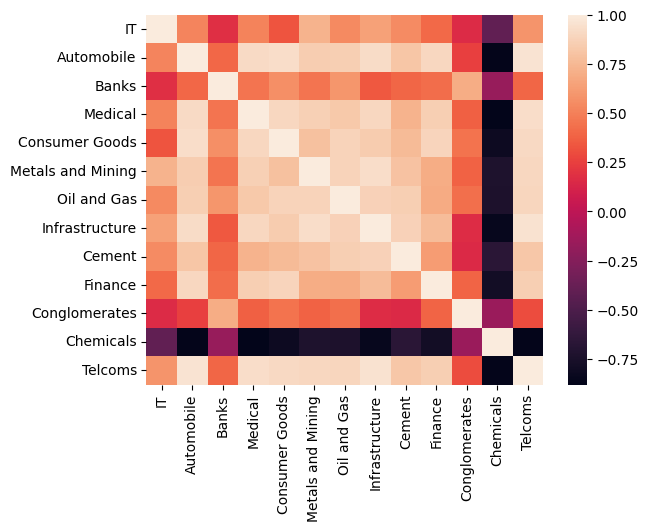

In [ ]:
sns.heatmap(nch.corr(),annot=False)